In [ ]:
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import scipy.integrate as integrate
from tqdm.auto import tqdm

matplotlib_inline.backend_inline.set_matplotlib_formats("png2x")
plt.style.use("default")
plt.rcParams.update(
    {
        "figure.constrained_layout.use": True,
        "figure.facecolor": "white",
    }
)

n_dense_points = 201

In [ ]:
class MLP(nn.Module):
    def __init__(self, *features, activation=nn.Tanh):
        super().__init__()

        layers = []
        for in_features, out_features in zip(features, features[1:]):
            layers.append(nn.Linear(in_features, out_features))
            layers.append(activation())
        self.network = nn.Sequential(*layers[:-1])

    def forward(self, x):
        return self.network(x)

In [ ]:
def grad(outputs, inputs):
    return torch.autograd.grad(outputs.sum(), inputs, create_graph=True)[0]

In [ ]:
domain=(0,1)

$$
-\epsilon y''+2y'+cy=0\\
y(0)=0,\quad y(1)=1
$$

In [ ]:

C=np.arange(1,600,5)

ϵ=1

In [ ]:
eps=1

In [ ]:
DATA11=[]
DATA12=[]
RATIO1=[]

for c in C:
    torch.manual_seed(78)
    model = MLP(1, 50, 50, 1)
    batch_size = 10000
    n_epochs = 500
    print_interval = n_epochs // 10
    learning_rate = 0.1
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer=optimizer,
                                            lr_lambda=lambda epoch: 0.98 ** epoch,
                                            last_epoch=-1,
                                            verbose=False)

    for epoch in tqdm(range(n_epochs)):
        optimizer.zero_grad()

        # 무작위 t 생성 후 y 계산
        t = torch.empty(batch_size, 1).uniform_(*domain).requires_grad_()
        y = t*(1-t)*model(t)+t
        a = np.array([[1,1],[np.exp(1+(1+c)**0.5),np.exp(1-(1+c)**0.5)]])
        b = np.array([0,1])
        x = np.linalg.solve(a, b)
        C_1 = x[0]
        C_2 = x[1]
        y_e = C_1*torch.exp((1+(1+c)**0.5)*t)+C_2*torch.exp((1-(1+c)**0.5)*t)
        y_t = grad(y, t)
        y_tt = grad(y_t,t)

        # Loss
        loss_de = F.mse_loss(eps*y_tt-2*y_t-c*y, torch.zeros_like(y_t))
        loss = loss_de
        realloss=F.mse_loss(y-y_e, torch.zeros_like(y))
        # Backprop
        loss.backward()
        optimizer.step()
        scheduler.step()
        if epoch % print_interval == 0:
            print(f"{epoch = }, loss_de = {loss_de.item():.4f}")
        if epoch==n_epochs-1:
            print(realloss.item())
            DATA11.append(realloss.item())
            DATA12.append(loss.item())
            RATIO1.append(realloss.item()/loss.item())


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 6.4616
epoch = 50, loss_de = 0.0291
epoch = 100, loss_de = 0.0003
epoch = 150, loss_de = 0.0002
epoch = 200, loss_de = 0.0002
epoch = 250, loss_de = 0.0002
epoch = 300, loss_de = 0.0002
epoch = 350, loss_de = 0.0002
epoch = 400, loss_de = 0.0002
epoch = 450, loss_de = 0.0002
1.5394505670229819e-09


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 28.5806
epoch = 50, loss_de = 0.0756
epoch = 100, loss_de = 0.0024
epoch = 150, loss_de = 0.0016
epoch = 200, loss_de = 0.0015
epoch = 250, loss_de = 0.0014
epoch = 300, loss_de = 0.0014
epoch = 350, loss_de = 0.0014
epoch = 400, loss_de = 0.0014
epoch = 450, loss_de = 0.0014
1.563692730854882e-09


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 67.7024
epoch = 50, loss_de = 0.1357
epoch = 100, loss_de = 0.0097
epoch = 150, loss_de = 0.0061
epoch = 200, loss_de = 0.0049
epoch = 250, loss_de = 0.0044
epoch = 300, loss_de = 0.0044
epoch = 350, loss_de = 0.0043
epoch = 400, loss_de = 0.0043
epoch = 450, loss_de = 0.0044
2.9473760321252485e-08


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 123.8271
epoch = 50, loss_de = 0.2805
epoch = 100, loss_de = 0.0139
epoch = 150, loss_de = 0.0109
epoch = 200, loss_de = 0.0103
epoch = 250, loss_de = 0.0088
epoch = 300, loss_de = 0.0096
epoch = 350, loss_de = 0.0092
epoch = 400, loss_de = 0.0093
epoch = 450, loss_de = 0.0096
3.7569659383507314e-08


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 196.9547
epoch = 50, loss_de = 0.3870
epoch = 100, loss_de = 0.0722
epoch = 150, loss_de = 0.0625
epoch = 200, loss_de = 0.0578
epoch = 250, loss_de = 0.0528
epoch = 300, loss_de = 0.0564
epoch = 350, loss_de = 0.0541
epoch = 400, loss_de = 0.0543
epoch = 450, loss_de = 0.0554
3.515783362217917e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 287.0852
epoch = 50, loss_de = 0.6994
epoch = 100, loss_de = 0.0599
epoch = 150, loss_de = 0.0543
epoch = 200, loss_de = 0.0520
epoch = 250, loss_de = 0.0481
epoch = 300, loss_de = 0.0507
epoch = 350, loss_de = 0.0490
epoch = 400, loss_de = 0.0492
epoch = 450, loss_de = 0.0506
2.2272038791015802e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 394.2185
epoch = 50, loss_de = 0.9790
epoch = 100, loss_de = 0.0812
epoch = 150, loss_de = 0.0619
epoch = 200, loss_de = 0.0557
epoch = 250, loss_de = 0.0450
epoch = 300, loss_de = 0.0530
epoch = 350, loss_de = 0.0475
epoch = 400, loss_de = 0.0498
epoch = 450, loss_de = 0.0509
1.1289583312645846e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 518.3547
epoch = 50, loss_de = 2.1339
epoch = 100, loss_de = 0.1562
epoch = 150, loss_de = 0.1321
epoch = 200, loss_de = 0.1225
epoch = 250, loss_de = 0.1036
epoch = 300, loss_de = 0.1162
epoch = 350, loss_de = 0.1087
epoch = 400, loss_de = 0.1104
epoch = 450, loss_de = 0.1130
3.0572172704523837e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 659.4938
epoch = 50, loss_de = 2.4807
epoch = 100, loss_de = 0.1407
epoch = 150, loss_de = 0.1241
epoch = 200, loss_de = 0.1185
epoch = 250, loss_de = 0.0996
epoch = 300, loss_de = 0.1160
epoch = 350, loss_de = 0.1080
epoch = 400, loss_de = 0.1097
epoch = 450, loss_de = 0.1114
2.477675309364713e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 817.6357
epoch = 50, loss_de = 4.5915
epoch = 100, loss_de = 0.2417
epoch = 150, loss_de = 0.2090
epoch = 200, loss_de = 0.1966
epoch = 250, loss_de = 0.1643
epoch = 300, loss_de = 0.1927
epoch = 350, loss_de = 0.1775
epoch = 400, loss_de = 0.1827
epoch = 450, loss_de = 0.1839
4.5777858304063557e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 992.7806
epoch = 50, loss_de = 29.3407
epoch = 100, loss_de = 5.3563
epoch = 150, loss_de = 4.0170
epoch = 200, loss_de = 3.6974
epoch = 250, loss_de = 3.2495
epoch = 300, loss_de = 3.5193
epoch = 350, loss_de = 3.2754
epoch = 400, loss_de = 3.3088
epoch = 450, loss_de = 3.3854
5.019561649532989e-05


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 1184.9283
epoch = 50, loss_de = 29.5383
epoch = 100, loss_de = 6.2567
epoch = 150, loss_de = 4.7243
epoch = 200, loss_de = 4.3950
epoch = 250, loss_de = 3.8324
epoch = 300, loss_de = 4.1632
epoch = 350, loss_de = 3.8810
epoch = 400, loss_de = 3.9274
epoch = 450, loss_de = 4.0034
5.6756216508802027e-05


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 1394.0789
epoch = 50, loss_de = 42.2643
epoch = 100, loss_de = 8.8092
epoch = 150, loss_de = 6.5536
epoch = 200, loss_de = 6.0754
epoch = 250, loss_de = 5.2585
epoch = 300, loss_de = 5.7286
epoch = 350, loss_de = 5.3124
epoch = 400, loss_de = 5.4007
epoch = 450, loss_de = 5.5017
7.719673158135265e-05


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 1620.2322
epoch = 50, loss_de = 61.3789
epoch = 100, loss_de = 11.8160
epoch = 150, loss_de = 8.6414
epoch = 200, loss_de = 7.9874
epoch = 250, loss_de = 6.8491
epoch = 300, loss_de = 7.5042
epoch = 350, loss_de = 6.9072
epoch = 400, loss_de = 7.0657
epoch = 450, loss_de = 7.1892
9.725021664053202e-05


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 1863.3888
epoch = 50, loss_de = 103.0471
epoch = 100, loss_de = 21.0744
epoch = 150, loss_de = 14.4227
epoch = 200, loss_de = 13.0792
epoch = 250, loss_de = 11.0868
epoch = 300, loss_de = 12.2366
epoch = 350, loss_de = 11.0362
epoch = 400, loss_de = 11.4102
epoch = 450, loss_de = 11.6795
0.00016076114843599498


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 2123.5476
epoch = 50, loss_de = 130.6607
epoch = 100, loss_de = 26.7819
epoch = 150, loss_de = 18.1344
epoch = 200, loss_de = 16.4653
epoch = 250, loss_de = 13.8397
epoch = 300, loss_de = 15.3492
epoch = 350, loss_de = 13.7643
epoch = 400, loss_de = 14.2986
epoch = 450, loss_de = 14.5595
0.0001876077731139958


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 2400.7097
epoch = 50, loss_de = 142.0203
epoch = 100, loss_de = 31.3136
epoch = 150, loss_de = 21.3314
epoch = 200, loss_de = 19.3099
epoch = 250, loss_de = 16.1192
epoch = 300, loss_de = 17.9216
epoch = 350, loss_de = 15.8470
epoch = 400, loss_de = 16.5086
epoch = 450, loss_de = 16.8693
0.00019316739053465426


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 2694.8745
epoch = 50, loss_de = 179.8603
epoch = 100, loss_de = 32.2602
epoch = 150, loss_de = 16.7618
epoch = 200, loss_de = 14.2363
epoch = 250, loss_de = 11.2250
epoch = 300, loss_de = 12.8411
epoch = 350, loss_de = 11.1706
epoch = 400, loss_de = 11.8124
epoch = 450, loss_de = 11.9109
9.77954114205204e-05


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 3006.0425
epoch = 50, loss_de = 221.8331
epoch = 100, loss_de = 44.5322
epoch = 150, loss_de = 22.6124
epoch = 200, loss_de = 19.1403
epoch = 250, loss_de = 15.0307
epoch = 300, loss_de = 17.2345
epoch = 350, loss_de = 14.8882
epoch = 400, loss_de = 15.8227
epoch = 450, loss_de = 15.8737
0.0001297997951041907


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 3334.2134
epoch = 50, loss_de = 283.5734
epoch = 100, loss_de = 76.1372
epoch = 150, loss_de = 40.4374
epoch = 200, loss_de = 31.6101
epoch = 250, loss_de = 24.5381
epoch = 300, loss_de = 27.9413
epoch = 350, loss_de = 23.6899
epoch = 400, loss_de = 25.3879
epoch = 450, loss_de = 25.6803
0.0001959393557626754


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 3679.3872
epoch = 50, loss_de = 344.9263
epoch = 100, loss_de = 98.5723
epoch = 150, loss_de = 65.0456
epoch = 200, loss_de = 45.0966
epoch = 250, loss_de = 34.8854
epoch = 300, loss_de = 39.3563
epoch = 350, loss_de = 33.1473
epoch = 400, loss_de = 35.5459
epoch = 450, loss_de = 36.0827
0.0002693622373044491


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 4041.5632
epoch = 50, loss_de = 419.3661
epoch = 100, loss_de = 118.9902
epoch = 150, loss_de = 61.9568
epoch = 200, loss_de = 50.3218
epoch = 250, loss_de = 39.4855
epoch = 300, loss_de = 45.0218
epoch = 350, loss_de = 37.8556
epoch = 400, loss_de = 40.7152
epoch = 450, loss_de = 41.2318
0.00027867863536812365


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 4420.7422
epoch = 50, loss_de = 454.4722
epoch = 100, loss_de = 140.7415
epoch = 150, loss_de = 78.6961
epoch = 200, loss_de = 63.3877
epoch = 250, loss_de = 49.5083
epoch = 300, loss_de = 56.3097
epoch = 350, loss_de = 47.1599
epoch = 400, loss_de = 50.7937
epoch = 450, loss_de = 51.4452
0.0003268772561568767


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 4816.9243
epoch = 50, loss_de = 503.3410
epoch = 100, loss_de = 151.3729
epoch = 150, loss_de = 100.5306
epoch = 200, loss_de = 91.8064
epoch = 250, loss_de = 76.1235
epoch = 300, loss_de = 85.6628
epoch = 350, loss_de = 73.9079
epoch = 400, loss_de = 79.2272
epoch = 450, loss_de = 79.0220
0.0006322316476143897


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 5230.1099
epoch = 50, loss_de = 591.3087
epoch = 100, loss_de = 197.6026
epoch = 150, loss_de = 130.7966
epoch = 200, loss_de = 96.9402
epoch = 250, loss_de = 75.9650
epoch = 300, loss_de = 85.6938
epoch = 350, loss_de = 71.7754
epoch = 400, loss_de = 77.3988
epoch = 450, loss_de = 77.6766
0.0004665844899136573


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 5660.2974
epoch = 50, loss_de = 740.6788
epoch = 100, loss_de = 264.1118
epoch = 150, loss_de = 180.4649
epoch = 200, loss_de = 163.5076
epoch = 250, loss_de = 138.0100
epoch = 300, loss_de = 154.7173
epoch = 350, loss_de = 132.5250
epoch = 400, loss_de = 140.8983
epoch = 450, loss_de = 143.8751
0.0009417390683665872


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 6107.4888
epoch = 50, loss_de = 860.3839
epoch = 100, loss_de = 307.0568
epoch = 150, loss_de = 212.0644
epoch = 200, loss_de = 192.8587
epoch = 250, loss_de = 163.2737
epoch = 300, loss_de = 182.8896
epoch = 350, loss_de = 156.5857
epoch = 400, loss_de = 166.5232
epoch = 450, loss_de = 169.8776
0.0010370747186243534


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 6571.6821
epoch = 50, loss_de = 879.2833
epoch = 100, loss_de = 330.9275
epoch = 150, loss_de = 231.3381
epoch = 200, loss_de = 210.7659
epoch = 250, loss_de = 178.5643
epoch = 300, loss_de = 200.2086
epoch = 350, loss_de = 171.2152
epoch = 400, loss_de = 182.5292
epoch = 450, loss_de = 185.8237
0.0010531790321692824


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 7052.8784
epoch = 50, loss_de = 849.9252
epoch = 100, loss_de = 329.7499
epoch = 150, loss_de = 231.6018
epoch = 200, loss_de = 213.2026
epoch = 250, loss_de = 179.9820
epoch = 300, loss_de = 202.3511
epoch = 350, loss_de = 172.9090
epoch = 400, loss_de = 184.8859
epoch = 450, loss_de = 187.0352
0.0010069618001580238


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 7551.0776
epoch = 50, loss_de = 871.3533
epoch = 100, loss_de = 351.2327
epoch = 150, loss_de = 248.3639
epoch = 200, loss_de = 228.6792
epoch = 250, loss_de = 189.7402
epoch = 300, loss_de = 199.8235
epoch = 350, loss_de = 164.7649
epoch = 400, loss_de = 176.2902
epoch = 450, loss_de = 178.6751
0.0006865406758151948


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 8066.2798
epoch = 50, loss_de = 870.3082
epoch = 100, loss_de = 362.9820
epoch = 150, loss_de = 228.1958
epoch = 200, loss_de = 195.2549
epoch = 250, loss_de = 157.2978
epoch = 300, loss_de = 179.2671
epoch = 350, loss_de = 149.1748
epoch = 400, loss_de = 161.8377
epoch = 450, loss_de = 162.4298
0.0006274852785281837


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 8598.4854
epoch = 50, loss_de = 943.9069
epoch = 100, loss_de = 402.8322
epoch = 150, loss_de = 241.5957
epoch = 200, loss_de = 211.3306
epoch = 250, loss_de = 170.9518
epoch = 300, loss_de = 195.4231
epoch = 350, loss_de = 162.4883
epoch = 400, loss_de = 176.6084
epoch = 450, loss_de = 176.8730
0.0006496685673482716


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 9147.6934
epoch = 50, loss_de = 1019.7447
epoch = 100, loss_de = 449.1552
epoch = 150, loss_de = 327.7582
epoch = 200, loss_de = 264.4958
epoch = 250, loss_de = 214.4449
epoch = 300, loss_de = 242.6212
epoch = 350, loss_de = 202.1907
epoch = 400, loss_de = 218.6268
epoch = 450, loss_de = 220.1239
0.0007673165528103709


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 9713.9043
epoch = 50, loss_de = 1097.2726
epoch = 100, loss_de = 497.1533
epoch = 150, loss_de = 365.6793
epoch = 200, loss_de = 342.2511
epoch = 250, loss_de = 291.3612
epoch = 300, loss_de = 328.4116
epoch = 350, loss_de = 279.5682
epoch = 400, loss_de = 299.5544
epoch = 450, loss_de = 303.1027
0.0011747919488698244


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 10297.1182
epoch = 50, loss_de = 1211.5020
epoch = 100, loss_de = 565.7070
epoch = 150, loss_de = 421.6547
epoch = 200, loss_de = 393.6678
epoch = 250, loss_de = 336.6313
epoch = 300, loss_de = 378.9650
epoch = 350, loss_de = 322.4424
epoch = 400, loss_de = 345.0211
epoch = 450, loss_de = 350.1580
0.0012269594008103013


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 10897.3340
epoch = 50, loss_de = 1327.1051
epoch = 100, loss_de = 616.5812
epoch = 150, loss_de = 460.3753
epoch = 200, loss_de = 385.5524
epoch = 250, loss_de = 316.9152
epoch = 300, loss_de = 357.0855
epoch = 350, loss_de = 298.4183
epoch = 400, loss_de = 321.4862
epoch = 450, loss_de = 324.9889
0.0009525013738311827


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 11514.5557
epoch = 50, loss_de = 1410.9918
epoch = 100, loss_de = 658.0402
epoch = 150, loss_de = 493.6220
epoch = 200, loss_de = 415.2089
epoch = 250, loss_de = 342.2531
epoch = 300, loss_de = 385.8984
epoch = 350, loss_de = 322.5519
epoch = 400, loss_de = 347.4644
epoch = 450, loss_de = 351.4166
0.0009777292143553495


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 12148.7764
epoch = 50, loss_de = 1532.6605
epoch = 100, loss_de = 754.5959
epoch = 150, loss_de = 573.2231
epoch = 200, loss_de = 538.8367
epoch = 250, loss_de = 464.5356
epoch = 300, loss_de = 522.1451
epoch = 350, loss_de = 444.6191
epoch = 400, loss_de = 474.6841
epoch = 450, loss_de = 482.9908
0.0013818996958434582


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 12800.0020
epoch = 50, loss_de = 1635.8289
epoch = 100, loss_de = 811.6689
epoch = 150, loss_de = 621.4642
epoch = 200, loss_de = 585.4839
epoch = 250, loss_de = 505.8304
epoch = 300, loss_de = 568.1096
epoch = 350, loss_de = 484.2008
epoch = 400, loss_de = 516.7787
epoch = 450, loss_de = 525.4683
0.0014500260585919023


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 13468.2305
epoch = 50, loss_de = 1713.2632
epoch = 100, loss_de = 873.0238
epoch = 150, loss_de = 673.3630
epoch = 200, loss_de = 635.8755
epoch = 250, loss_de = 550.5134
epoch = 300, loss_de = 617.9961
epoch = 350, loss_de = 527.0563
epoch = 400, loss_de = 562.2421
epoch = 450, loss_de = 571.7589
0.0015063617611303926


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 14153.4609
epoch = 50, loss_de = 1850.6610
epoch = 100, loss_de = 943.1680
epoch = 150, loss_de = 731.4834
epoch = 200, loss_de = 692.2803
epoch = 250, loss_de = 600.6716
epoch = 300, loss_de = 673.8044
epoch = 350, loss_de = 575.1127
epoch = 400, loss_de = 613.1225
epoch = 450, loss_de = 623.5833
0.001568940351717174


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 14855.6963
epoch = 50, loss_de = 1979.1906
epoch = 100, loss_de = 1021.6635
epoch = 150, loss_de = 796.0010
epoch = 200, loss_de = 754.6645
epoch = 250, loss_de = 656.3256
epoch = 300, loss_de = 735.5747
epoch = 350, loss_de = 628.3959
epoch = 400, loss_de = 669.4520
epoch = 450, loss_de = 680.9647
0.0016350385267287493


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 15574.9316
epoch = 50, loss_de = 2088.4939
epoch = 100, loss_de = 1092.1993
epoch = 150, loss_de = 855.4364
epoch = 200, loss_de = 812.8012
epoch = 250, loss_de = 708.1450
epoch = 300, loss_de = 793.2696
epoch = 350, loss_de = 678.1296
epoch = 400, loss_de = 722.1190
epoch = 450, loss_de = 734.5322
0.001693201600573957


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 16311.1709
epoch = 50, loss_de = 2195.2092
epoch = 100, loss_de = 1157.8492
epoch = 150, loss_de = 911.3034
epoch = 200, loss_de = 868.0894
epoch = 250, loss_de = 757.3391
epoch = 300, loss_de = 848.2044
epoch = 350, loss_de = 725.4043
epoch = 400, loss_de = 772.2991
epoch = 450, loss_de = 785.4747
0.001742393709719181


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 17064.4141
epoch = 50, loss_de = 2302.5691
epoch = 100, loss_de = 1225.1383
epoch = 150, loss_de = 967.4841
epoch = 200, loss_de = 923.3459
epoch = 250, loss_de = 801.3289
epoch = 300, loss_de = 866.1575
epoch = 350, loss_de = 724.5387
epoch = 400, loss_de = 770.3551
epoch = 450, loss_de = 782.1894
0.0013790496159344912


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 17834.6602
epoch = 50, loss_de = 2391.1602
epoch = 100, loss_de = 1287.9729
epoch = 150, loss_de = 943.8856
epoch = 200, loss_de = 862.2677
epoch = 250, loss_de = 732.6745
epoch = 300, loss_de = 824.6744
epoch = 350, loss_de = 694.8534
epoch = 400, loss_de = 744.7232
epoch = 450, loss_de = 754.9775
0.0013586216373369098


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 18621.9062
epoch = 50, loss_de = 2501.6331
epoch = 100, loss_de = 1279.4069
epoch = 150, loss_de = 932.1134
epoch = 200, loss_de = 864.7994
epoch = 250, loss_de = 735.2581
epoch = 300, loss_de = 831.2772
epoch = 350, loss_de = 698.3754
epoch = 400, loss_de = 751.3351
epoch = 450, loss_de = 759.5861
0.0013072778237983584


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 19426.1582
epoch = 50, loss_de = 2730.1816
epoch = 100, loss_de = 1495.1835
epoch = 150, loss_de = 1195.0868
epoch = 200, loss_de = 1143.6593
epoch = 250, loss_de = 940.4286
epoch = 300, loss_de = 1044.1696
epoch = 350, loss_de = 886.6869
epoch = 400, loss_de = 945.0309
epoch = 450, loss_de = 959.6374
0.0016430129762738943


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 20247.4121
epoch = 50, loss_de = 2890.8103
epoch = 100, loss_de = 1587.2178
epoch = 150, loss_de = 1275.2148
epoch = 200, loss_de = 1225.1754
epoch = 250, loss_de = 1078.0542
epoch = 300, loss_de = 1203.5037
epoch = 350, loss_de = 1032.7289
epoch = 400, loss_de = 1097.1801
epoch = 450, loss_de = 1115.5417
0.0020091107580810785


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 21085.6699
epoch = 50, loss_de = 3059.9419
epoch = 100, loss_de = 1711.4636
epoch = 150, loss_de = 1253.6758
epoch = 200, loss_de = 1163.6063
epoch = 250, loss_de = 1002.9092
epoch = 300, loss_de = 1124.2889
epoch = 350, loss_de = 953.0840
epoch = 400, loss_de = 1017.9861
epoch = 450, loss_de = 1033.0295
0.00154292827937752


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 21940.9297
epoch = 50, loss_de = 3286.0569
epoch = 100, loss_de = 1820.3728
epoch = 150, loss_de = 1367.6791
epoch = 200, loss_de = 1268.2332
epoch = 250, loss_de = 1095.4012
epoch = 300, loss_de = 1224.6790
epoch = 350, loss_de = 1040.2351
epoch = 400, loss_de = 1109.6093
epoch = 450, loss_de = 1125.8777
0.0016163417603820562


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 22813.1895
epoch = 50, loss_de = 3482.5681
epoch = 100, loss_de = 1938.0148
epoch = 150, loss_de = 1568.3070
epoch = 200, loss_de = 1512.4208
epoch = 250, loss_de = 1338.4452
epoch = 300, loss_de = 1488.5269
epoch = 350, loss_de = 1280.8594
epoch = 400, loss_de = 1358.9637
epoch = 450, loss_de = 1379.6088
0.0021783255506306887


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 23702.4590
epoch = 50, loss_de = 3620.3904
epoch = 100, loss_de = 2036.6030
epoch = 150, loss_de = 1653.7241
epoch = 200, loss_de = 1597.4539
epoch = 250, loss_de = 1415.3883
epoch = 300, loss_de = 1573.4077
epoch = 350, loss_de = 1354.6926
epoch = 400, loss_de = 1436.8635
epoch = 450, loss_de = 1458.5648
0.0022330544888973236


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 24608.7266
epoch = 50, loss_de = 3782.3904
epoch = 100, loss_de = 2136.0793
epoch = 150, loss_de = 1739.6754
epoch = 200, loss_de = 1682.6000
epoch = 250, loss_de = 1492.5243
epoch = 300, loss_de = 1658.5332
epoch = 350, loss_de = 1428.6379
epoch = 400, loss_de = 1515.0093
epoch = 450, loss_de = 1537.5948
0.0022781442385166883


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 25531.9961
epoch = 50, loss_de = 3834.1189
epoch = 100, loss_de = 2204.1560
epoch = 150, loss_de = 1699.0140
epoch = 200, loss_de = 1587.7527
epoch = 250, loss_de = 1380.1465
epoch = 300, loss_de = 1539.3571
epoch = 350, loss_de = 1311.6823
epoch = 400, loss_de = 1397.0024
epoch = 450, loss_de = 1416.8844
0.001792690483853221


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 26472.2695
epoch = 50, loss_de = 3889.3057
epoch = 100, loss_de = 2262.4224
epoch = 150, loss_de = 1856.8582
epoch = 200, loss_de = 1800.8790
epoch = 250, loss_de = 1596.8215
epoch = 300, loss_de = 1768.7102
epoch = 350, loss_de = 1509.3445
epoch = 400, loss_de = 1595.9500
epoch = 450, loss_de = 1617.5814
0.002092658542096615


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 27429.5488
epoch = 50, loss_de = 3943.1765
epoch = 100, loss_de = 2212.4021
epoch = 150, loss_de = 1685.4924
epoch = 200, loss_de = 1591.7687
epoch = 250, loss_de = 1380.3301
epoch = 300, loss_de = 1550.4688
epoch = 350, loss_de = 1315.1155
epoch = 400, loss_de = 1405.3844
epoch = 450, loss_de = 1424.5599
0.0017321878112852573


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 28403.8301
epoch = 50, loss_de = 4048.9329
epoch = 100, loss_de = 2389.0361
epoch = 150, loss_de = 1980.8456
epoch = 200, loss_de = 1918.6116
epoch = 250, loss_de = 1605.5964
epoch = 300, loss_de = 1784.2528
epoch = 350, loss_de = 1523.9316
epoch = 400, loss_de = 1620.0496
epoch = 450, loss_de = 1644.9188
0.0019988256972283125


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 29395.1113
epoch = 50, loss_de = 4106.4946
epoch = 100, loss_de = 2468.3438
epoch = 150, loss_de = 2052.6602
epoch = 200, loss_de = 1997.5840
epoch = 250, loss_de = 1760.8322
epoch = 300, loss_de = 1903.6316
epoch = 350, loss_de = 1614.8949
epoch = 400, loss_de = 1712.5568
epoch = 450, loss_de = 1738.8132
0.0019306415924802423


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 30403.3945
epoch = 50, loss_de = 4272.6118
epoch = 100, loss_de = 2566.7661
epoch = 150, loss_de = 2142.2971
epoch = 200, loss_de = 2086.4841
epoch = 250, loss_de = 1855.5562
epoch = 300, loss_de = 2067.6362
epoch = 350, loss_de = 1780.3431
epoch = 400, loss_de = 1888.3684
epoch = 450, loss_de = 1918.6354
0.0023793699219822884


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 31428.6855
epoch = 50, loss_de = 4452.2437
epoch = 100, loss_de = 2708.0996
epoch = 150, loss_de = 2265.0083
epoch = 200, loss_de = 2209.6284
epoch = 250, loss_de = 1968.5529
epoch = 300, loss_de = 2191.0005
epoch = 350, loss_de = 1888.1545
epoch = 400, loss_de = 2002.3232
epoch = 450, loss_de = 2032.9600
0.002426320221275091


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 32470.9766
epoch = 50, loss_de = 4591.4482
epoch = 100, loss_de = 2810.4067
epoch = 150, loss_de = 2356.5842
epoch = 200, loss_de = 2301.1042
epoch = 250, loss_de = 2051.3850
epoch = 300, loss_de = 2283.0320
epoch = 350, loss_de = 1967.8772
epoch = 400, loss_de = 2086.5676
epoch = 450, loss_de = 2118.6230
0.0024636071175336838


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 33530.2695
epoch = 50, loss_de = 4774.4956
epoch = 100, loss_de = 2923.3281
epoch = 150, loss_de = 2457.1768
epoch = 200, loss_de = 2402.3892
epoch = 250, loss_de = 2143.6868
epoch = 300, loss_de = 2384.8328
epoch = 350, loss_de = 2056.3342
epoch = 400, loss_de = 2180.2925
epoch = 450, loss_de = 2212.9709
0.002490696031600237


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 34606.5664
epoch = 50, loss_de = 5007.4575
epoch = 100, loss_de = 3046.6975
epoch = 150, loss_de = 2562.9895
epoch = 200, loss_de = 2509.4336
epoch = 250, loss_de = 2241.2307
epoch = 300, loss_de = 2492.2751
epoch = 350, loss_de = 2149.7793
epoch = 400, loss_de = 2279.1130
epoch = 450, loss_de = 2312.6177
0.0025294101797044277


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 35699.8672
epoch = 50, loss_de = 5171.5225
epoch = 100, loss_de = 3184.4182
epoch = 150, loss_de = 2682.1267
epoch = 200, loss_de = 2626.3953
epoch = 250, loss_de = 2347.8110
epoch = 300, loss_de = 2609.1653
epoch = 350, loss_de = 2251.7026
epoch = 400, loss_de = 2386.5859
epoch = 450, loss_de = 2421.1006
0.0025875025894492865


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 36810.1719
epoch = 50, loss_de = 5458.2866
epoch = 100, loss_de = 3361.3513
epoch = 150, loss_de = 2832.0388
epoch = 200, loss_de = 2776.8293
epoch = 250, loss_de = 2486.0115
epoch = 300, loss_de = 2758.8367
epoch = 350, loss_de = 2382.9541
epoch = 400, loss_de = 2525.5984
epoch = 450, loss_de = 2558.6870
0.0026490541640669107


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 37937.4766
epoch = 50, loss_de = 5572.5610
epoch = 100, loss_de = 3451.8320
epoch = 150, loss_de = 2914.5237
epoch = 200, loss_de = 2860.0408
epoch = 250, loss_de = 2560.9563
epoch = 300, loss_de = 2843.0452
epoch = 350, loss_de = 2455.4253
epoch = 400, loss_de = 2602.4358
epoch = 450, loss_de = 2637.2163
0.0026638787239789963


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 39081.7773
epoch = 50, loss_de = 5772.4849
epoch = 100, loss_de = 3573.9907
epoch = 150, loss_de = 3023.9167
epoch = 200, loss_de = 2969.8069
epoch = 250, loss_de = 2660.9412
epoch = 300, loss_de = 2953.3433
epoch = 350, loss_de = 2551.3445
epoch = 400, loss_de = 2703.9949
epoch = 450, loss_de = 2739.5088
0.002699753502383828


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 40243.0938
epoch = 50, loss_de = 5968.9502
epoch = 100, loss_de = 3704.2600
epoch = 150, loss_de = 3139.7029
epoch = 200, loss_de = 3086.0510
epoch = 250, loss_de = 2767.0195
epoch = 300, loss_de = 3069.9761
epoch = 350, loss_de = 2652.9387
epoch = 400, loss_de = 2811.5901
epoch = 450, loss_de = 2847.4861
0.0027371461037546396


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 41421.4102
epoch = 50, loss_de = 6146.0918
epoch = 100, loss_de = 3831.0601
epoch = 150, loss_de = 3252.2200
epoch = 200, loss_de = 3199.1440
epoch = 250, loss_de = 2870.0762
epoch = 300, loss_de = 3183.5664
epoch = 350, loss_de = 2751.7417
epoch = 400, loss_de = 2916.2544
epoch = 450, loss_de = 2952.7090
0.0027697912883013487


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 42616.7266
epoch = 50, loss_de = 6315.7500
epoch = 100, loss_de = 3960.4956
epoch = 150, loss_de = 3365.1233
epoch = 200, loss_de = 3312.6602
epoch = 250, loss_de = 2973.4922
epoch = 300, loss_de = 3297.6150
epoch = 350, loss_de = 2850.9153
epoch = 400, loss_de = 3021.3181
epoch = 450, loss_de = 3058.3660
0.002800906077027321


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 43829.0469
epoch = 50, loss_de = 6498.6187
epoch = 100, loss_de = 4094.6260
epoch = 150, loss_de = 3483.5369
epoch = 200, loss_de = 3431.8796
epoch = 250, loss_de = 3082.3059
epoch = 300, loss_de = 3417.3191
epoch = 350, loss_de = 2955.1633
epoch = 400, loss_de = 3131.7561
epoch = 450, loss_de = 3169.1489
0.0028343487065285444


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 45058.3672
epoch = 50, loss_de = 6693.9878
epoch = 100, loss_de = 4238.5190
epoch = 150, loss_de = 3614.4851
epoch = 200, loss_de = 3563.9849
epoch = 250, loss_de = 3203.4294
epoch = 300, loss_de = 3549.7864
epoch = 350, loss_de = 3070.9209
epoch = 400, loss_de = 3254.4097
epoch = 450, loss_de = 3291.4194
0.0028743192087858915


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 46304.6914
epoch = 50, loss_de = 7009.6362
epoch = 100, loss_de = 4411.0166
epoch = 150, loss_de = 3765.7373
epoch = 200, loss_de = 3715.6453
epoch = 250, loss_de = 3342.8950
epoch = 300, loss_de = 3701.2739
epoch = 350, loss_de = 3203.7983
epoch = 400, loss_de = 3395.1201
epoch = 450, loss_de = 3430.9121
0.0029310043901205063


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 47568.0273
epoch = 50, loss_de = 7207.8975
epoch = 100, loss_de = 4545.4863
epoch = 150, loss_de = 3886.1753
epoch = 200, loss_de = 3837.2593
epoch = 250, loss_de = 3453.8877
epoch = 300, loss_de = 3823.5647
epoch = 350, loss_de = 3310.2419
epoch = 400, loss_de = 3507.9004
epoch = 450, loss_de = 3544.1228
0.002961274702101946


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 48848.3516
epoch = 50, loss_de = 7349.7510
epoch = 100, loss_de = 4650.4292
epoch = 150, loss_de = 3983.8433
epoch = 200, loss_de = 3935.8403
epoch = 250, loss_de = 3542.8228
epoch = 300, loss_de = 3923.4048
epoch = 350, loss_de = 3396.3716
epoch = 400, loss_de = 3599.0376
epoch = 450, loss_de = 3637.6191
0.00297951209358871


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 50145.6914
epoch = 50, loss_de = 7517.4287
epoch = 100, loss_de = 4774.4829
epoch = 150, loss_de = 4097.4258
epoch = 200, loss_de = 4050.8391
epoch = 250, loss_de = 3647.7732
epoch = 300, loss_de = 4039.6567
epoch = 350, loss_de = 3497.3921
epoch = 400, loss_de = 3706.0752
epoch = 450, loss_de = 3745.5945
0.0030028512701392174


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 51460.0273
epoch = 50, loss_de = 7696.3794
epoch = 100, loss_de = 4912.5015
epoch = 150, loss_de = 4221.7319
epoch = 200, loss_de = 4176.4414
epoch = 250, loss_de = 3762.6455
epoch = 300, loss_de = 4166.1860
epoch = 350, loss_de = 3607.5977
epoch = 400, loss_de = 3822.9055
epoch = 450, loss_de = 3862.7151
0.003030861495062709


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 52791.3672
epoch = 50, loss_de = 7845.6401
epoch = 100, loss_de = 5047.5566
epoch = 150, loss_de = 4343.7686
epoch = 200, loss_de = 4299.7202
epoch = 250, loss_de = 3875.2637
epoch = 300, loss_de = 4290.5557
epoch = 350, loss_de = 3715.8313
epoch = 400, loss_de = 3937.5476
epoch = 450, loss_de = 3978.1147
0.0030583699699491262


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 54139.7070
epoch = 50, loss_de = 8009.8359
epoch = 100, loss_de = 5181.5674
epoch = 150, loss_de = 4468.7310
epoch = 200, loss_de = 4425.7905
epoch = 250, loss_de = 3990.5259
epoch = 300, loss_de = 4417.7852
epoch = 350, loss_de = 3826.6101
epoch = 400, loss_de = 4054.8577
epoch = 450, loss_de = 4096.1899
0.003086894052103162


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 55505.0547
epoch = 50, loss_de = 8205.4756
epoch = 100, loss_de = 5342.0938
epoch = 150, loss_de = 4610.2974
epoch = 200, loss_de = 4569.9370
epoch = 250, loss_de = 4122.7700
epoch = 300, loss_de = 4562.5498
epoch = 350, loss_de = 3953.1140
epoch = 400, loss_de = 4188.9551
epoch = 450, loss_de = 4229.8359
0.0031242240220308304


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 56887.4062
epoch = 50, loss_de = 8469.4893
epoch = 100, loss_de = 5498.9824
epoch = 150, loss_de = 4751.3540
epoch = 200, loss_de = 4710.9038
epoch = 250, loss_de = 4251.7598
epoch = 300, loss_de = 4704.1226
epoch = 350, loss_de = 4076.5945
epoch = 400, loss_de = 4319.7358
epoch = 450, loss_de = 4360.8203
0.00316195422783494


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 58286.7578
epoch = 50, loss_de = 8695.6055
epoch = 100, loss_de = 5657.9824
epoch = 150, loss_de = 4891.9087
epoch = 200, loss_de = 4852.4307
epoch = 250, loss_de = 4381.0898
epoch = 300, loss_de = 4846.1606
epoch = 350, loss_de = 4200.3545
epoch = 400, loss_de = 4450.9673
epoch = 450, loss_de = 4492.0776
0.003195337485522032


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 59703.1094
epoch = 50, loss_de = 8868.2305
epoch = 100, loss_de = 5833.6245
epoch = 150, loss_de = 5046.1450
epoch = 200, loss_de = 5007.4526
epoch = 250, loss_de = 4522.9585
epoch = 300, loss_de = 5001.0986
epoch = 350, loss_de = 4335.7114
epoch = 400, loss_de = 4594.5361
epoch = 450, loss_de = 4634.8257
0.0032363776117563248


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 61136.4688
epoch = 50, loss_de = 9219.8301
epoch = 100, loss_de = 6028.1870
epoch = 150, loss_de = 5214.4131
epoch = 200, loss_de = 5178.3818
epoch = 250, loss_de = 4679.8091
epoch = 300, loss_de = 5171.6382
epoch = 350, loss_de = 4485.0635
epoch = 400, loss_de = 4753.0400
epoch = 450, loss_de = 4791.4854
0.0032863959204405546


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 62586.8281
epoch = 50, loss_de = 9487.6836
epoch = 100, loss_de = 6207.3901
epoch = 150, loss_de = 5378.1821
epoch = 200, loss_de = 5344.6714
epoch = 250, loss_de = 4833.0605
epoch = 300, loss_de = 5338.3989
epoch = 350, loss_de = 4631.0942
epoch = 400, loss_de = 4908.2969
epoch = 450, loss_de = 4944.2817
0.003325800644233823


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 64054.1953
epoch = 50, loss_de = 9639.6445
epoch = 100, loss_de = 6352.0889
epoch = 150, loss_de = 5510.9751
epoch = 200, loss_de = 5478.9453
epoch = 250, loss_de = 4955.4150
epoch = 300, loss_de = 5473.6504
epoch = 350, loss_de = 4748.2842
epoch = 400, loss_de = 5033.2197
epoch = 450, loss_de = 5068.7886
0.0033395171631127596


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 65538.5625
epoch = 50, loss_de = 9901.0400
epoch = 100, loss_de = 6551.3521
epoch = 150, loss_de = 5684.3887
epoch = 200, loss_de = 5655.2676
epoch = 250, loss_de = 5117.1313
epoch = 300, loss_de = 5649.5850
epoch = 350, loss_de = 4902.3145
epoch = 400, loss_de = 5196.9756
epoch = 450, loss_de = 5230.2944
0.0033893215004354715


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 67039.9297
epoch = 50, loss_de = 10191.9336
epoch = 100, loss_de = 6795.3184
epoch = 150, loss_de = 5898.1499
epoch = 200, loss_de = 5871.9526
epoch = 250, loss_de = 5317.4707
epoch = 300, loss_de = 5864.7954
epoch = 350, loss_de = 5092.1626
epoch = 400, loss_de = 5398.8257
epoch = 450, loss_de = 5426.2778
0.003461948363110423


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 68558.2969
epoch = 50, loss_de = 10495.3506
epoch = 100, loss_de = 7025.9497
epoch = 150, loss_de = 6092.9717
epoch = 200, loss_de = 6065.9399
epoch = 250, loss_de = 5495.3906
epoch = 300, loss_de = 6057.2822
epoch = 350, loss_de = 5261.3394
epoch = 400, loss_de = 5578.1294
epoch = 450, loss_de = 5603.3003
0.0035328518133610487


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 70093.6719
epoch = 50, loss_de = 11229.9443
epoch = 100, loss_de = 7203.8286
epoch = 150, loss_de = 6248.6396
epoch = 200, loss_de = 6222.3872
epoch = 250, loss_de = 5641.6074
epoch = 300, loss_de = 6215.1592
epoch = 350, loss_de = 5401.7212
epoch = 400, loss_de = 5723.1338
epoch = 450, loss_de = 5749.3159
0.0035563281271606684


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 71646.0469
epoch = 50, loss_de = 11004.6738
epoch = 100, loss_de = 7325.6543
epoch = 150, loss_de = 6373.3970
epoch = 200, loss_de = 6348.2695
epoch = 250, loss_de = 5756.4688
epoch = 300, loss_de = 6345.0391
epoch = 350, loss_de = 5514.2593
epoch = 400, loss_de = 5841.1221
epoch = 450, loss_de = 5873.3535
0.0035890548024326563


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 73215.4375
epoch = 50, loss_de = 11186.7500
epoch = 100, loss_de = 7534.5552
epoch = 150, loss_de = 6560.0654
epoch = 200, loss_de = 6542.7866
epoch = 250, loss_de = 5933.3042
epoch = 300, loss_de = 6537.5381
epoch = 350, loss_de = 5680.6704
epoch = 400, loss_de = 6023.5254
epoch = 450, loss_de = 6045.7139
0.0036238753236830235


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 74801.8125
epoch = 50, loss_de = 11602.1016
epoch = 100, loss_de = 7766.6914
epoch = 150, loss_de = 6758.2432
epoch = 200, loss_de = 6741.0474
epoch = 250, loss_de = 6115.2402
epoch = 300, loss_de = 6734.7959
epoch = 350, loss_de = 5854.0669
epoch = 400, loss_de = 6207.5522
epoch = 450, loss_de = 6227.4678
0.0036887675523757935


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 76405.2031
epoch = 50, loss_de = 11569.2207
epoch = 100, loss_de = 7884.8110
epoch = 150, loss_de = 6882.0513
epoch = 200, loss_de = 6872.1895
epoch = 250, loss_de = 6235.9106
epoch = 300, loss_de = 6869.0337
epoch = 350, loss_de = 5970.2554
epoch = 400, loss_de = 6331.1626
epoch = 450, loss_de = 6350.6992
0.0036820792593061924


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 78025.5938
epoch = 50, loss_de = 11981.4541
epoch = 100, loss_de = 8096.7617
epoch = 150, loss_de = 7069.0527
epoch = 200, loss_de = 7061.5786
epoch = 250, loss_de = 6410.6704
epoch = 300, loss_de = 7058.5015
epoch = 350, loss_de = 6136.8584
epoch = 400, loss_de = 6507.6362
epoch = 450, loss_de = 6524.4297
0.003730302443727851


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 79662.9922
epoch = 50, loss_de = 12464.6602
epoch = 100, loss_de = 8295.3330
epoch = 150, loss_de = 7246.8120
epoch = 200, loss_de = 7241.4575
epoch = 250, loss_de = 6575.6787
epoch = 300, loss_de = 7238.5498
epoch = 350, loss_de = 6294.4390
epoch = 400, loss_de = 6675.0024
epoch = 450, loss_de = 6690.0547
0.003770123701542616


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 81317.3750
epoch = 50, loss_de = 13584.5840
epoch = 100, loss_de = 8635.9824
epoch = 150, loss_de = 7522.0166
epoch = 200, loss_de = 7511.7183
epoch = 250, loss_de = 6824.1191
epoch = 300, loss_de = 7503.9590
epoch = 350, loss_de = 6529.7998
epoch = 400, loss_de = 6924.0806
epoch = 450, loss_de = 6934.0840
0.003896624781191349


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 82988.7656
epoch = 50, loss_de = 12831.5420
epoch = 100, loss_de = 8746.9492
epoch = 150, loss_de = 7637.9878
epoch = 200, loss_de = 7634.3545
epoch = 250, loss_de = 6936.4800
epoch = 300, loss_de = 7630.4326
epoch = 350, loss_de = 6638.5542
epoch = 400, loss_de = 7039.8169
epoch = 450, loss_de = 7050.9058
0.0038791641127318144


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 84677.1719
epoch = 50, loss_de = 13225.3867
epoch = 100, loss_de = 8915.4717
epoch = 150, loss_de = 7789.8081
epoch = 200, loss_de = 7787.1729
epoch = 250, loss_de = 7075.0825
epoch = 300, loss_de = 7784.3794
epoch = 350, loss_de = 6771.9810
epoch = 400, loss_de = 7181.3906
epoch = 450, loss_de = 7194.5591
0.0039014576468616724


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 86382.5703
epoch = 50, loss_de = 14017.5088
epoch = 100, loss_de = 9121.2334
epoch = 150, loss_de = 7973.6416
epoch = 200, loss_de = 7973.9624
epoch = 250, loss_de = 7246.7432
epoch = 300, loss_de = 7971.6519
epoch = 350, loss_de = 6936.0015
epoch = 400, loss_de = 7355.4385
epoch = 450, loss_de = 7366.8535
0.003940636292099953


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 88104.9844
epoch = 50, loss_de = 14391.6963
epoch = 100, loss_de = 9330.3467
epoch = 150, loss_de = 8158.1104
epoch = 200, loss_de = 8158.2290
epoch = 250, loss_de = 7415.4263
epoch = 300, loss_de = 8156.2646
epoch = 350, loss_de = 7097.5850
epoch = 400, loss_de = 7526.6777
epoch = 450, loss_de = 7537.7710
0.003982009366154671


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 89844.3906
epoch = 50, loss_de = 13990.4717
epoch = 100, loss_de = 9486.6064
epoch = 150, loss_de = 8306.0557
epoch = 200, loss_de = 8311.7812
epoch = 250, loss_de = 7556.3521
epoch = 300, loss_de = 8312.2939
epoch = 350, loss_de = 7232.9985
epoch = 400, loss_de = 7670.5366
epoch = 450, loss_de = 7681.5674
0.0039882962591946125


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 91600.7969
epoch = 50, loss_de = 14352.4717
epoch = 100, loss_de = 9728.5361
epoch = 150, loss_de = 8517.7744
epoch = 200, loss_de = 8525.6689
epoch = 250, loss_de = 7753.9072
epoch = 300, loss_de = 8525.8408
epoch = 350, loss_de = 7420.9736
epoch = 400, loss_de = 7869.8657
epoch = 450, loss_de = 7876.7402
0.004040122497826815


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 93374.2109
epoch = 50, loss_de = 14992.5244
epoch = 100, loss_de = 9967.8467
epoch = 150, loss_de = 8726.5156
epoch = 200, loss_de = 8736.0723
epoch = 250, loss_de = 7947.5938
epoch = 300, loss_de = 8735.7803
epoch = 350, loss_de = 7605.5176
epoch = 400, loss_de = 8065.4214
epoch = 450, loss_de = 8069.3657
0.0040916805155575275


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 95164.6406
epoch = 50, loss_de = 15389.9502
epoch = 100, loss_de = 10184.5234
epoch = 150, loss_de = 8924.9463
epoch = 200, loss_de = 8939.9268
epoch = 250, loss_de = 8136.0576
epoch = 300, loss_de = 8940.3477
epoch = 350, loss_de = 7785.2183
epoch = 400, loss_de = 8255.9287
epoch = 450, loss_de = 8256.2305
0.004130799788981676


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 96972.0547
epoch = 50, loss_de = 15539.8418
epoch = 100, loss_de = 10398.3389
epoch = 150, loss_de = 9117.6094
epoch = 200, loss_de = 9136.1367
epoch = 250, loss_de = 8316.9531
epoch = 300, loss_de = 9137.5254
epoch = 350, loss_de = 7958.0488
epoch = 400, loss_de = 8439.1611
epoch = 450, loss_de = 8437.0996
0.004165789112448692


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 98796.4766
epoch = 50, loss_de = 15644.3027
epoch = 100, loss_de = 10607.2881
epoch = 150, loss_de = 9305.6523
epoch = 200, loss_de = 9327.5791
epoch = 250, loss_de = 8493.0664
epoch = 300, loss_de = 9330.0957
epoch = 350, loss_de = 8126.5498
epoch = 400, loss_de = 8617.8340
epoch = 450, loss_de = 8614.2627
0.004197320900857449


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 100637.9062
epoch = 50, loss_de = 15896.2207
epoch = 100, loss_de = 10794.1709
epoch = 150, loss_de = 9479.2305
epoch = 200, loss_de = 9504.3301
epoch = 250, loss_de = 8654.8467
epoch = 300, loss_de = 9508.3779
epoch = 350, loss_de = 8281.7803
epoch = 400, loss_de = 8782.6221
epoch = 450, loss_de = 8779.0469
0.004217884503304958


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 102496.3359
epoch = 50, loss_de = 16258.4561
epoch = 100, loss_de = 10998.3906
epoch = 150, loss_de = 9664.3477
epoch = 200, loss_de = 9692.7012
epoch = 250, loss_de = 8827.8418
epoch = 300, loss_de = 9698.1045
epoch = 350, loss_de = 8447.5391
epoch = 400, loss_de = 8958.4316
epoch = 450, loss_de = 8953.9893
0.004245288670063019


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 104371.7734
epoch = 50, loss_de = 16454.9688
epoch = 100, loss_de = 11199.3711
epoch = 150, loss_de = 9845.2158
epoch = 200, loss_de = 9876.9248
epoch = 250, loss_de = 8996.5352
epoch = 300, loss_de = 9883.7041
epoch = 350, loss_de = 8609.2900
epoch = 400, loss_de = 9130.1396
epoch = 450, loss_de = 9125.4854
0.0042688013054430485


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 106264.2031
epoch = 50, loss_de = 16576.3965
epoch = 100, loss_de = 11402.9258
epoch = 150, loss_de = 10024.8809
epoch = 200, loss_de = 10057.4766
epoch = 250, loss_de = 9160.9580
epoch = 300, loss_de = 10065.3027
epoch = 350, loss_de = 8767.0869
epoch = 400, loss_de = 9297.7715
epoch = 450, loss_de = 9294.1250
0.004291169811040163


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 108173.6484
epoch = 50, loss_de = 17276.7031
epoch = 100, loss_de = 11641.1611
epoch = 150, loss_de = 10232.9424
epoch = 200, loss_de = 10267.2451
epoch = 250, loss_de = 9353.1553
epoch = 300, loss_de = 10275.0156
epoch = 350, loss_de = 8950.7852
epoch = 400, loss_de = 9492.5322
epoch = 450, loss_de = 9487.5684
0.004332004580646753


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 110100.0938
epoch = 50, loss_de = 18218.1895
epoch = 100, loss_de = 11889.2051
epoch = 150, loss_de = 10458.2988
epoch = 200, loss_de = 10496.3027
epoch = 250, loss_de = 9564.9004
epoch = 300, loss_de = 10504.2188
epoch = 350, loss_de = 9152.4561
epoch = 400, loss_de = 9706.2266
epoch = 450, loss_de = 9697.0400
0.004380137659609318


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 112043.5312
epoch = 50, loss_de = 18643.9570
epoch = 100, loss_de = 12149.5557
epoch = 150, loss_de = 10687.1270
epoch = 200, loss_de = 10727.7900
epoch = 250, loss_de = 9778.3682
epoch = 300, loss_de = 10735.4443
epoch = 350, loss_de = 9355.8965
epoch = 400, loss_de = 9921.6807
epoch = 450, loss_de = 9908.9619
0.004430749453604221


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 114003.9688
epoch = 50, loss_de = 19002.8867
epoch = 100, loss_de = 12376.7783
epoch = 150, loss_de = 10891.5488
epoch = 200, loss_de = 10934.8691
epoch = 250, loss_de = 9968.5469
epoch = 300, loss_de = 10943.3369
epoch = 350, loss_de = 9537.7920
epoch = 400, loss_de = 10114.5234
epoch = 450, loss_de = 10100.4648
0.004463431425392628


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 115981.4297
epoch = 50, loss_de = 19388.3379
epoch = 100, loss_de = 12629.4580
epoch = 150, loss_de = 11113.3975
epoch = 200, loss_de = 11159.3184
epoch = 250, loss_de = 10175.1299
epoch = 300, loss_de = 11167.9053
epoch = 350, loss_de = 9734.9355
epoch = 400, loss_de = 10323.3828
epoch = 450, loss_de = 10306.7334
0.004506704863160849


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 117975.8594
epoch = 50, loss_de = 19716.9766
epoch = 100, loss_de = 12885.2686
epoch = 150, loss_de = 11340.1504
epoch = 200, loss_de = 11389.5234
epoch = 250, loss_de = 10387.3027
epoch = 300, loss_de = 11398.2549
epoch = 350, loss_de = 9937.2959
epoch = 400, loss_de = 10537.7764
epoch = 450, loss_de = 10517.9697
0.004551601130515337


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 119987.3281
epoch = 50, loss_de = 20073.0410
epoch = 100, loss_de = 13128.7490
epoch = 150, loss_de = 11558.0186
epoch = 200, loss_de = 11610.5586
epoch = 250, loss_de = 10590.6836
epoch = 300, loss_de = 11619.9307
epoch = 350, loss_de = 10131.6348
epoch = 400, loss_de = 10743.7422
epoch = 450, loss_de = 10721.8008
0.004589490592479706


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 122015.7969
epoch = 50, loss_de = 20426.5508
epoch = 100, loss_de = 13363.7949
epoch = 150, loss_de = 11769.4287
epoch = 200, loss_de = 11825.2363
epoch = 250, loss_de = 10787.9580
epoch = 300, loss_de = 11835.6133
epoch = 350, loss_de = 10320.3711
epoch = 400, loss_de = 10943.8701
epoch = 450, loss_de = 10920.4336
0.0046216524206101894


$$
\epsilon=0.5
$$


In [ ]:
eps=0.5

In [ ]:
DATA21=[]
DATA22=[]
RATIO2=[]

for c in C:
    torch.manual_seed(78)
    model = MLP(1, 50, 50, 1)
    batch_size = 10000
    n_epochs = 500
    print_interval = n_epochs // 10
    learning_rate = 0.1
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer=optimizer,
                                            lr_lambda=lambda epoch: 0.98 ** epoch,
                                            last_epoch=-1,
                                            verbose=False)

    for epoch in tqdm(range(n_epochs)):
        optimizer.zero_grad()

        # 무작위 t 생성 후 y 계산
        t = torch.empty(batch_size, 1).uniform_(*domain).requires_grad_()
        y = t*(1-t)*model(t)+t
        a = np.array([[1,1],[np.exp(1/eps+((1/eps)**2+c/eps)**0.5),np.exp(1/eps-((1/eps)**2+c/eps)**0.5)]])
        b = np.array([0,1])
        x = np.linalg.solve(a, b)
        C_1 = x[0]
        C_2 = x[1]
        y_e = C_1*torch.exp((1/eps+((1/eps)**2+c/eps)**0.5)*t)+C_2*torch.exp((1/eps-((1/eps)**2+c/eps)**0.5)*t)
        y_t = grad(y, t)
        y_tt = grad(y_t,t)

        # Loss
        loss_de = F.mse_loss(eps*y_tt-2*y_t-c*y, torch.zeros_like(y_t))
        loss = loss_de
        realloss=F.mse_loss(y-y_e, torch.zeros_like(y))
        # Backprop
        loss.backward()
        optimizer.step()
        scheduler.step()
        if epoch % print_interval == 0:
            print(f"{epoch = }, loss_de = {loss_de.item():.4f}")
        if epoch==n_epochs-1:
            print(realloss.item())
            DATA21.append(realloss.item())
            DATA22.append(loss.item())
            RATIO2.append(realloss.item()/loss.item())


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 6.4074
epoch = 50, loss_de = 0.1069
epoch = 100, loss_de = 0.0007
epoch = 150, loss_de = 0.0004
epoch = 200, loss_de = 0.0003
epoch = 250, loss_de = 0.0003
epoch = 300, loss_de = 0.0003
epoch = 350, loss_de = 0.0003
epoch = 400, loss_de = 0.0003
epoch = 450, loss_de = 0.0003
1.7841260913087353e-08


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 28.4543
epoch = 50, loss_de = 0.0505
epoch = 100, loss_de = 0.0004
epoch = 150, loss_de = 0.0003
epoch = 200, loss_de = 0.0003
epoch = 250, loss_de = 0.0002
epoch = 300, loss_de = 0.0003
epoch = 350, loss_de = 0.0003
epoch = 400, loss_de = 0.0003
epoch = 450, loss_de = 0.0003
2.644859442568759e-09


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 67.5041
epoch = 50, loss_de = 0.1565
epoch = 100, loss_de = 0.0013
epoch = 150, loss_de = 0.0006
epoch = 200, loss_de = 0.0006
epoch = 250, loss_de = 0.0005
epoch = 300, loss_de = 0.0006
epoch = 350, loss_de = 0.0005
epoch = 400, loss_de = 0.0005
epoch = 450, loss_de = 0.0005
2.115623898291119e-09


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 123.5567
epoch = 50, loss_de = 0.7811
epoch = 100, loss_de = 0.0490
epoch = 150, loss_de = 0.0355
epoch = 200, loss_de = 0.0308
epoch = 250, loss_de = 0.0247
epoch = 300, loss_de = 0.0284
epoch = 350, loss_de = 0.0260
epoch = 400, loss_de = 0.0269
epoch = 450, loss_de = 0.0276
4.926184260511945e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 196.6123
epoch = 50, loss_de = 1.9994
epoch = 100, loss_de = 0.0771
epoch = 150, loss_de = 0.0633
epoch = 200, loss_de = 0.0584
epoch = 250, loss_de = 0.0453
epoch = 300, loss_de = 0.0560
epoch = 350, loss_de = 0.0503
epoch = 400, loss_de = 0.0527
epoch = 450, loss_de = 0.0533
8.668331474837032e-07


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 286.6707
epoch = 50, loss_de = 13.1085
epoch = 100, loss_de = 2.6510
epoch = 150, loss_de = 1.9373
epoch = 200, loss_de = 1.7974
epoch = 250, loss_de = 1.5511
epoch = 300, loss_de = 1.6869
epoch = 350, loss_de = 1.5669
epoch = 400, loss_de = 1.5954
epoch = 450, loss_de = 1.6131
0.0001167147493106313


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 393.7320
epoch = 50, loss_de = 20.1852
epoch = 100, loss_de = 4.4593
epoch = 150, loss_de = 3.2434
epoch = 200, loss_de = 2.9986
epoch = 250, loss_de = 2.5494
epoch = 300, loss_de = 2.8004
epoch = 350, loss_de = 2.5751
epoch = 400, loss_de = 2.6523
epoch = 450, loss_de = 2.6635
0.00017620876315049827


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 517.7961
epoch = 50, loss_de = 33.3446
epoch = 100, loss_de = 7.7761
epoch = 150, loss_de = 5.5410
epoch = 200, loss_de = 5.0975
epoch = 250, loss_de = 4.2879
epoch = 300, loss_de = 4.7432
epoch = 350, loss_de = 4.3068
epoch = 400, loss_de = 4.4860
epoch = 450, loss_de = 4.4766
0.0002706587838474661


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 658.8632
epoch = 50, loss_de = 64.4535
epoch = 100, loss_de = 15.8850
epoch = 150, loss_de = 10.6889
epoch = 200, loss_de = 9.6895
epoch = 250, loss_de = 8.0611
epoch = 300, loss_de = 8.9629
epoch = 350, loss_de = 7.9638
epoch = 400, loss_de = 8.3836
epoch = 450, loss_de = 8.4125
0.0004658288380596787


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 816.9330
epoch = 50, loss_de = 71.1649
epoch = 100, loss_de = 14.3930
epoch = 150, loss_de = 8.1813
epoch = 200, loss_de = 6.9750
epoch = 250, loss_de = 5.3975
epoch = 300, loss_de = 6.2597
epoch = 350, loss_de = 5.3797
epoch = 400, loss_de = 5.7810
epoch = 450, loss_de = 5.7020
0.00020643702009692788


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 992.0058
epoch = 50, loss_de = 104.3413
epoch = 100, loss_de = 27.2542
epoch = 150, loss_de = 15.1812
epoch = 200, loss_de = 12.8910
epoch = 250, loss_de = 10.0189
epoch = 300, loss_de = 11.5644
epoch = 350, loss_de = 9.8010
epoch = 400, loss_de = 10.6114
epoch = 450, loss_de = 10.4802
0.00034911674447357655


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 1184.0814
epoch = 50, loss_de = 149.9971
epoch = 100, loss_de = 53.2222
epoch = 150, loss_de = 31.0266
epoch = 200, loss_de = 25.6079
epoch = 250, loss_de = 20.2567
epoch = 300, loss_de = 23.0250
epoch = 350, loss_de = 19.3252
epoch = 400, loss_de = 20.8678
epoch = 450, loss_de = 20.9342
0.0005871417233720422


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 1393.1600
epoch = 50, loss_de = 177.5027
epoch = 100, loss_de = 68.1361
epoch = 150, loss_de = 40.8626
epoch = 200, loss_de = 34.1073
epoch = 250, loss_de = 27.0586
epoch = 300, loss_de = 30.7792
epoch = 350, loss_de = 25.7723
epoch = 400, loss_de = 27.8631
epoch = 450, loss_de = 27.9171
0.0006864294409751892


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 1619.2415
epoch = 50, loss_de = 225.0211
epoch = 100, loss_de = 92.2486
epoch = 150, loss_de = 65.1884
epoch = 200, loss_de = 60.0857
epoch = 250, loss_de = 50.7397
epoch = 300, loss_de = 56.3207
epoch = 350, loss_de = 47.3139
epoch = 400, loss_de = 50.1308
epoch = 450, loss_de = 50.5560
0.0011697927257046103


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 1862.3256
epoch = 50, loss_de = 306.2524
epoch = 100, loss_de = 133.3781
epoch = 150, loss_de = 94.9641
epoch = 200, loss_de = 87.6007
epoch = 250, loss_de = 66.9604
epoch = 300, loss_de = 74.1500
epoch = 350, loss_de = 62.5340
epoch = 400, loss_de = 66.9567
epoch = 450, loss_de = 67.5290
0.0013356300769373775


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 2122.4128
epoch = 50, loss_de = 312.3830
epoch = 100, loss_de = 143.9519
epoch = 150, loss_de = 104.9936
epoch = 200, loss_de = 97.6567
epoch = 250, loss_de = 83.3961
epoch = 300, loss_de = 93.5825
epoch = 350, loss_de = 79.9671
epoch = 400, loss_de = 85.3382
epoch = 450, loss_de = 86.5045
0.0016284406883642077


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 2399.5027
epoch = 50, loss_de = 317.6272
epoch = 100, loss_de = 152.4632
epoch = 150, loss_de = 114.4702
epoch = 200, loss_de = 107.9691
epoch = 250, loss_de = 92.3002
epoch = 300, loss_de = 103.7446
epoch = 350, loss_de = 88.5664
epoch = 400, loss_de = 94.8973
epoch = 450, loss_de = 95.5554
0.0016391986282542348


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 2693.5957
epoch = 50, loss_de = 362.9101
epoch = 100, loss_de = 180.4552
epoch = 150, loss_de = 137.5670
epoch = 200, loss_de = 130.2752
epoch = 250, loss_de = 111.8869
epoch = 300, loss_de = 125.7208
epoch = 350, loss_de = 107.2963
epoch = 400, loss_de = 114.8606
epoch = 450, loss_de = 115.8677
0.0017508044838905334


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 3004.6914
epoch = 50, loss_de = 427.5151
epoch = 100, loss_de = 221.3387
epoch = 150, loss_de = 170.8071
epoch = 200, loss_de = 161.5241
epoch = 250, loss_de = 139.6421
epoch = 300, loss_de = 156.5878
epoch = 350, loss_de = 133.7302
epoch = 400, loss_de = 142.7807
epoch = 450, loss_de = 144.6218
0.0018661441281437874


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 3332.7903
epoch = 50, loss_de = 483.7511
epoch = 100, loss_de = 256.0902
epoch = 150, loss_de = 198.9895
epoch = 200, loss_de = 189.2204
epoch = 250, loss_de = 164.0448
epoch = 300, loss_de = 183.8721
epoch = 350, loss_de = 157.1225
epoch = 400, loss_de = 167.7047
epoch = 450, loss_de = 169.7487
0.002008378505706787


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 3677.8916
epoch = 50, loss_de = 544.3569
epoch = 100, loss_de = 296.6778
epoch = 150, loss_de = 233.4079
epoch = 200, loss_de = 222.4141
epoch = 250, loss_de = 193.7963
epoch = 300, loss_de = 216.9186
epoch = 350, loss_de = 185.6320
epoch = 400, loss_de = 197.7496
epoch = 450, loss_de = 200.5554
0.002113953698426485


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 4039.9961
epoch = 50, loss_de = 596.7720
epoch = 100, loss_de = 332.3058
epoch = 150, loss_de = 263.8080
epoch = 200, loss_de = 241.9319
epoch = 250, loss_de = 201.5778
epoch = 300, loss_de = 225.3150
epoch = 350, loss_de = 190.6627
epoch = 400, loss_de = 203.9003
epoch = 450, loss_de = 206.2534
0.0018220174824818969


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 4419.1030
epoch = 50, loss_de = 665.4358
epoch = 100, loss_de = 367.8888
epoch = 150, loss_de = 262.2601
epoch = 200, loss_de = 243.2861
epoch = 250, loss_de = 207.1143
epoch = 300, loss_de = 233.6595
epoch = 350, loss_de = 196.6447
epoch = 400, loss_de = 211.6485
epoch = 450, loss_de = 213.0839
0.0017045228742063046


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 4815.2134
epoch = 50, loss_de = 761.9262
epoch = 100, loss_de = 437.2504
epoch = 150, loss_de = 353.4182
epoch = 200, loss_de = 340.0594
epoch = 250, loss_de = 299.7389
epoch = 300, loss_de = 334.0693
epoch = 350, loss_de = 287.2050
epoch = 400, loss_de = 304.8591
epoch = 450, loss_de = 309.5578
0.0024958814028650522


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 5228.3262
epoch = 50, loss_de = 846.2805
epoch = 100, loss_de = 493.8375
epoch = 150, loss_de = 402.2930
epoch = 200, loss_de = 388.2296
epoch = 250, loss_de = 343.5549
epoch = 300, loss_de = 382.1336
epoch = 350, loss_de = 329.1506
epoch = 400, loss_de = 348.9137
epoch = 450, loss_de = 354.3997
0.0026199256535619497


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 5658.4424
epoch = 50, loss_de = 908.8645
epoch = 100, loss_de = 537.8248
epoch = 150, loss_de = 441.4672
epoch = 200, loss_de = 427.7997
epoch = 250, loss_de = 379.3164
epoch = 300, loss_de = 421.8240
epoch = 350, loss_de = 363.5527
epoch = 400, loss_de = 385.3998
epoch = 450, loss_de = 391.2131
0.002680603414773941


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 6105.5610
epoch = 50, loss_de = 990.5900
epoch = 100, loss_de = 592.0648
epoch = 150, loss_de = 486.6201
epoch = 200, loss_de = 471.8188
epoch = 250, loss_de = 418.6456
epoch = 300, loss_de = 465.3393
epoch = 350, loss_de = 401.0873
epoch = 400, loss_de = 425.4973
epoch = 450, loss_de = 430.8130
0.002776576904579997


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 6569.6826
epoch = 50, loss_de = 1023.4399
epoch = 100, loss_de = 635.3099
epoch = 150, loss_de = 529.2238
epoch = 200, loss_de = 515.7897
epoch = 250, loss_de = 459.1935
epoch = 300, loss_de = 510.3063
epoch = 350, loss_de = 440.4320
epoch = 400, loss_de = 466.6280
epoch = 450, loss_de = 473.5438
0.002809049328789115


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 7050.8071
epoch = 50, loss_de = 1090.0481
epoch = 100, loss_de = 679.8514
epoch = 150, loss_de = 570.0876
epoch = 200, loss_de = 556.7288
epoch = 250, loss_de = 496.1899
epoch = 300, loss_de = 551.6743
epoch = 350, loss_de = 476.1472
epoch = 400, loss_de = 504.3955
epoch = 450, loss_de = 512.0816
0.0028600108344107866


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 7548.9346
epoch = 50, loss_de = 1158.8318
epoch = 100, loss_de = 728.5193
epoch = 150, loss_de = 613.8982
epoch = 200, loss_de = 600.6136
epoch = 250, loss_de = 535.9179
epoch = 300, loss_de = 595.9251
epoch = 350, loss_de = 514.4344
epoch = 400, loss_de = 544.9036
epoch = 450, loss_de = 553.2521
0.0029088472947478294


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 8064.0649
epoch = 50, loss_de = 1244.9609
epoch = 100, loss_de = 788.3093
epoch = 150, loss_de = 667.8102
epoch = 200, loss_de = 654.6415
epoch = 250, loss_de = 585.2330
epoch = 300, loss_de = 650.2919
epoch = 350, loss_de = 561.7712
epoch = 400, loss_de = 594.8995
epoch = 450, loss_de = 603.7890
0.002979208482429385


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 8596.1973
epoch = 50, loss_de = 1341.6316
epoch = 100, loss_de = 853.4823
epoch = 150, loss_de = 725.3004
epoch = 200, loss_de = 712.2597
epoch = 250, loss_de = 637.8395
epoch = 300, loss_de = 708.1818
epoch = 350, loss_de = 612.2119
epoch = 400, loss_de = 648.1907
epoch = 450, loss_de = 657.5229
0.0030580852180719376


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 9145.3340
epoch = 50, loss_de = 1440.5330
epoch = 100, loss_de = 918.7004
epoch = 150, loss_de = 782.9799
epoch = 200, loss_de = 770.5192
epoch = 250, loss_de = 691.0741
epoch = 300, loss_de = 766.7639
epoch = 350, loss_de = 663.2582
epoch = 400, loss_de = 702.1627
epoch = 450, loss_de = 711.8738
0.003128570271655917


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 9711.4727
epoch = 50, loss_de = 1538.0049
epoch = 100, loss_de = 987.6972
epoch = 150, loss_de = 844.2424
epoch = 200, loss_de = 832.0834
epoch = 250, loss_de = 747.3519
epoch = 300, loss_de = 828.5842
epoch = 350, loss_de = 717.1639
epoch = 400, loss_de = 759.1737
epoch = 450, loss_de = 769.1484
0.0032042351085692644


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 10294.6133
epoch = 50, loss_de = 1641.8464
epoch = 100, loss_de = 1057.5276
epoch = 150, loss_de = 906.3036
epoch = 200, loss_de = 894.4514
epoch = 250, loss_de = 804.3612
epoch = 300, loss_de = 891.2515
epoch = 350, loss_de = 771.8512
epoch = 400, loss_de = 816.9379
epoch = 450, loss_de = 827.3339
0.0032853111624717712


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 10894.7588
epoch = 50, loss_de = 1738.6874
epoch = 100, loss_de = 1132.2993
epoch = 150, loss_de = 973.6401
epoch = 200, loss_de = 961.8477
epoch = 250, loss_de = 866.1607
epoch = 300, loss_de = 958.9382
epoch = 350, loss_de = 831.0140
epoch = 400, loss_de = 879.4661
epoch = 450, loss_de = 890.0300
0.0033697402104735374


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 11511.9062
epoch = 50, loss_de = 1840.5236
epoch = 100, loss_de = 1206.6888
epoch = 150, loss_de = 1040.5220
epoch = 200, loss_de = 1029.2664
epoch = 250, loss_de = 927.9573
epoch = 300, loss_de = 1026.7181
epoch = 350, loss_de = 890.2215
epoch = 400, loss_de = 942.1043
epoch = 450, loss_de = 952.8007
0.003442943561822176


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 12146.0566
epoch = 50, loss_de = 1933.2928
epoch = 100, loss_de = 1277.1260
epoch = 150, loss_de = 1104.4016
epoch = 200, loss_de = 1094.7534
epoch = 250, loss_de = 987.9900
epoch = 300, loss_de = 1092.7836
epoch = 350, loss_de = 947.8202
epoch = 400, loss_de = 1003.1961
epoch = 450, loss_de = 1013.8824
0.0034877751022577286


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 12797.2100
epoch = 50, loss_de = 2028.8499
epoch = 100, loss_de = 1354.1812
epoch = 150, loss_de = 1174.7719
epoch = 200, loss_de = 1166.0699
epoch = 250, loss_de = 1053.4562
epoch = 300, loss_de = 1164.5215
epoch = 350, loss_de = 1010.5007
epoch = 400, loss_de = 1069.6051
epoch = 450, loss_de = 1080.1659
0.0035521499812602997


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 13465.3662
epoch = 50, loss_de = 2149.3115
epoch = 100, loss_de = 1436.0352
epoch = 150, loss_de = 1247.2354
epoch = 200, loss_de = 1238.2917
epoch = 250, loss_de = 1119.5323
epoch = 300, loss_de = 1237.0833
epoch = 350, loss_de = 1073.8422
epoch = 400, loss_de = 1136.5099
epoch = 450, loss_de = 1147.5419
0.0036368058063089848


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 14150.5244
epoch = 50, loss_de = 2272.1470
epoch = 100, loss_de = 1514.2585
epoch = 150, loss_de = 1317.6757
epoch = 200, loss_de = 1310.2917
epoch = 250, loss_de = 1185.4456
epoch = 300, loss_de = 1309.5577
epoch = 350, loss_de = 1136.9598
epoch = 400, loss_de = 1203.5439
epoch = 450, loss_de = 1214.4406
0.003684035036712885


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 14852.6865
epoch = 50, loss_de = 2410.3535
epoch = 100, loss_de = 1625.9519
epoch = 150, loss_de = 1415.8876
epoch = 200, loss_de = 1409.7358
epoch = 250, loss_de = 1277.3464
epoch = 300, loss_de = 1408.5731
epoch = 350, loss_de = 1224.0717
epoch = 400, loss_de = 1296.1754
epoch = 450, loss_de = 1304.7850
0.00380376516841352


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 15571.8525
epoch = 50, loss_de = 2524.4570
epoch = 100, loss_de = 1707.7286
epoch = 150, loss_de = 1490.7433
epoch = 200, loss_de = 1486.2520
epoch = 250, loss_de = 1347.4279
epoch = 300, loss_de = 1485.6108
epoch = 350, loss_de = 1291.1385
epoch = 400, loss_de = 1367.5657
epoch = 450, loss_de = 1375.6906
0.0038491524755954742


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 16308.0176
epoch = 50, loss_de = 2647.0000
epoch = 100, loss_de = 1811.6434
epoch = 150, loss_de = 1582.6329
epoch = 200, loss_de = 1579.0658
epoch = 250, loss_de = 1432.8715
epoch = 300, loss_de = 1578.3700
epoch = 350, loss_de = 1372.5847
epoch = 400, loss_de = 1453.9639
epoch = 450, loss_de = 1460.9821
0.0039605265483260155


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 17061.1895
epoch = 50, loss_de = 2823.9021
epoch = 100, loss_de = 1925.8000
epoch = 150, loss_de = 1683.2136
epoch = 200, loss_de = 1680.7115
epoch = 250, loss_de = 1526.8131
epoch = 300, loss_de = 1679.7252
epoch = 350, loss_de = 1461.9672
epoch = 400, loss_de = 1548.6790
epoch = 450, loss_de = 1553.9104
0.004093226511031389


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 17831.3633
epoch = 50, loss_de = 2874.9490
epoch = 100, loss_de = 1998.8306
epoch = 150, loss_de = 1750.6602
epoch = 200, loss_de = 1749.5861
epoch = 250, loss_de = 1589.5768
epoch = 300, loss_de = 1749.7460
epoch = 350, loss_de = 1522.5798
epoch = 400, loss_de = 1613.0350
epoch = 450, loss_de = 1619.1405
0.004110135603696108


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 18618.5391
epoch = 50, loss_de = 3015.1687
epoch = 100, loss_de = 2078.4351
epoch = 150, loss_de = 1827.2992
epoch = 200, loss_de = 1828.8984
epoch = 250, loss_de = 1662.5240
epoch = 300, loss_de = 1830.0861
epoch = 350, loss_de = 1592.5612
epoch = 400, loss_de = 1687.4362
epoch = 450, loss_de = 1693.0918
0.0041368273086845875


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 19422.7188
epoch = 50, loss_de = 3149.8196
epoch = 100, loss_de = 2201.4075
epoch = 150, loss_de = 1933.9517
epoch = 200, loss_de = 1936.1492
epoch = 250, loss_de = 1761.3698
epoch = 300, loss_de = 1936.8217
epoch = 350, loss_de = 1686.5914
epoch = 400, loss_de = 1787.1772
epoch = 450, loss_de = 1790.9596
0.004262616857886314


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 20243.8984
epoch = 50, loss_de = 3297.1025
epoch = 100, loss_de = 2309.7800
epoch = 150, loss_de = 2029.7684
epoch = 200, loss_de = 2033.0468
epoch = 250, loss_de = 1850.5200
epoch = 300, loss_de = 2033.8176
epoch = 350, loss_de = 1771.7064
epoch = 400, loss_de = 1877.3593
epoch = 450, loss_de = 1880.2184
0.004351353272795677


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 21082.0840
epoch = 50, loss_de = 3423.8877
epoch = 100, loss_de = 2401.7488
epoch = 150, loss_de = 2114.1372
epoch = 200, loss_de = 2119.1409
epoch = 250, loss_de = 1929.5426
epoch = 300, loss_de = 2120.7473
epoch = 350, loss_de = 1847.5520
epoch = 400, loss_de = 1957.7810
epoch = 450, loss_de = 1960.6016
0.004397879354655743


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 21937.2734
epoch = 50, loss_de = 3554.3013
epoch = 100, loss_de = 2502.1257
epoch = 150, loss_de = 2204.0288
epoch = 200, loss_de = 2210.3291
epoch = 250, loss_de = 2013.0699
epoch = 300, loss_de = 2212.4070
epoch = 350, loss_de = 1927.5789
epoch = 400, loss_de = 2042.7177
epoch = 450, loss_de = 2045.2866
0.0044532716274261475


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 22809.4629
epoch = 50, loss_de = 3689.5049
epoch = 100, loss_de = 2607.8701
epoch = 150, loss_de = 2298.7412
epoch = 200, loss_de = 2306.2639
epoch = 250, loss_de = 2101.1597
epoch = 300, loss_de = 2308.7471
epoch = 350, loss_de = 2011.8503
epoch = 400, loss_de = 2132.1184
epoch = 450, loss_de = 2134.0701
0.004515985958278179


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 23698.6562
epoch = 50, loss_de = 3837.4248
epoch = 100, loss_de = 2716.8459
epoch = 150, loss_de = 2397.7769
epoch = 200, loss_de = 2407.5271
epoch = 250, loss_de = 2194.4998
epoch = 300, loss_de = 2410.4204
epoch = 350, loss_de = 2100.9968
epoch = 400, loss_de = 2226.6853
epoch = 450, loss_de = 2227.3879
0.004583949688822031


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 24604.8535
epoch = 50, loss_de = 4174.8374
epoch = 100, loss_de = 2850.5967
epoch = 150, loss_de = 2516.5344
epoch = 200, loss_de = 2528.3235
epoch = 250, loss_de = 2306.5134
epoch = 300, loss_de = 2530.9619
epoch = 350, loss_de = 2207.4597
epoch = 400, loss_de = 2339.4563
epoch = 450, loss_de = 2337.1816
0.004699846263974905


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 25528.0488
epoch = 50, loss_de = 4287.2505
epoch = 100, loss_de = 2964.0906
epoch = 150, loss_de = 2619.2373
epoch = 200, loss_de = 2633.0400
epoch = 250, loss_de = 2403.0769
epoch = 300, loss_de = 2636.1897
epoch = 350, loss_de = 2299.7476
epoch = 400, loss_de = 2437.2700
epoch = 450, loss_de = 2433.8125
0.004768226761370897


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 26468.2539
epoch = 50, loss_de = 4397.6431
epoch = 100, loss_de = 3068.3977
epoch = 150, loss_de = 2714.5061
epoch = 200, loss_de = 2730.1494
epoch = 250, loss_de = 2492.1909
epoch = 300, loss_de = 2734.1128
epoch = 350, loss_de = 2385.1958
epoch = 400, loss_de = 2527.9321
epoch = 450, loss_de = 2524.2239
0.004810885060578585


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 27425.4590
epoch = 50, loss_de = 4536.6748
epoch = 100, loss_de = 3174.0417
epoch = 150, loss_de = 2810.0935
epoch = 200, loss_de = 2827.3809
epoch = 250, loss_de = 2581.2649
epoch = 300, loss_de = 2832.1792
epoch = 350, loss_de = 2470.6438
epoch = 400, loss_de = 2618.6489
epoch = 450, loss_de = 2614.9319
0.004850069992244244


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 28399.6641
epoch = 50, loss_de = 4928.2056
epoch = 100, loss_de = 3299.2285
epoch = 150, loss_de = 2921.8196
epoch = 200, loss_de = 2940.5947
epoch = 250, loss_de = 2685.4331
epoch = 300, loss_de = 2945.5479
epoch = 350, loss_de = 2570.1157
epoch = 400, loss_de = 2724.1052
epoch = 450, loss_de = 2719.1545
0.004929231479763985


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 29390.8809
epoch = 50, loss_de = 5127.8057
epoch = 100, loss_de = 3435.7932
epoch = 150, loss_de = 3042.4836
epoch = 200, loss_de = 3062.9731
epoch = 250, loss_de = 2798.4109
epoch = 300, loss_de = 3067.8708
epoch = 350, loss_de = 2677.8101
epoch = 400, loss_de = 2838.1409
epoch = 450, loss_de = 2831.2458
0.005027231760323048


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 30399.0918
epoch = 50, loss_de = 5316.4434
epoch = 100, loss_de = 3563.2859
epoch = 150, loss_de = 3157.0176
epoch = 200, loss_de = 3179.3582
epoch = 250, loss_de = 2905.6804
epoch = 300, loss_de = 3184.5901
epoch = 350, loss_de = 2780.2683
epoch = 400, loss_de = 2946.6831
epoch = 450, loss_de = 2938.4663
0.00510247191414237


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 31424.3047
epoch = 50, loss_de = 5497.9238
epoch = 100, loss_de = 3690.8792
epoch = 150, loss_de = 3271.8398
epoch = 200, loss_de = 3296.0703
epoch = 250, loss_de = 3013.1809
epoch = 300, loss_de = 3301.7363
epoch = 350, loss_de = 2883.0225
epoch = 400, loss_de = 3055.5713
epoch = 450, loss_de = 3046.1899
0.0051734535954892635


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 32466.5254
epoch = 50, loss_de = 5690.9326
epoch = 100, loss_de = 3817.1533
epoch = 150, loss_de = 3386.0620
epoch = 200, loss_de = 3412.3196
epoch = 250, loss_de = 3120.1785
epoch = 300, loss_de = 3418.5327
epoch = 350, loss_de = 2985.3669
epoch = 400, loss_de = 3164.0598
epoch = 450, loss_de = 3153.6772
0.005237448960542679


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 33525.7500
epoch = 50, loss_de = 5880.0322
epoch = 100, loss_de = 3949.8484
epoch = 150, loss_de = 3504.2056
epoch = 200, loss_de = 3531.6008
epoch = 250, loss_de = 3229.6953
epoch = 300, loss_de = 3538.0947
epoch = 350, loss_de = 3090.1316
epoch = 400, loss_de = 3275.1309
epoch = 450, loss_de = 3264.0225
0.005307476501911879


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 34601.9727
epoch = 50, loss_de = 6081.1318
epoch = 100, loss_de = 4091.0571
epoch = 150, loss_de = 3629.9548
epoch = 200, loss_de = 3658.8772
epoch = 250, loss_de = 3346.9329
epoch = 300, loss_de = 3665.5120
epoch = 350, loss_de = 3202.1064
epoch = 400, loss_de = 3393.7236
epoch = 450, loss_de = 3381.2051
0.005391932092607021


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 35695.1992
epoch = 50, loss_de = 6283.8208
epoch = 100, loss_de = 4229.9233
epoch = 150, loss_de = 3754.3936
epoch = 200, loss_de = 3785.9788
epoch = 250, loss_de = 3464.4419
epoch = 300, loss_de = 3793.1899
epoch = 350, loss_de = 3314.3193
epoch = 400, loss_de = 3512.5093
epoch = 450, loss_de = 3498.2112
0.005466418340802193


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 36805.4336
epoch = 50, loss_de = 6488.4834
epoch = 100, loss_de = 4369.8262
epoch = 150, loss_de = 3880.9663
epoch = 200, loss_de = 3914.7944
epoch = 250, loss_de = 3583.2925
epoch = 300, loss_de = 3922.4280
epoch = 350, loss_de = 3427.8633
epoch = 400, loss_de = 3632.7244
epoch = 450, loss_de = 3616.8809
0.005541888996958733


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 37932.6641
epoch = 50, loss_de = 6686.7827
epoch = 100, loss_de = 4513.8608
epoch = 150, loss_de = 4008.3696
epoch = 200, loss_de = 4044.0713
epoch = 250, loss_de = 3702.3232
epoch = 300, loss_de = 4052.0356
epoch = 350, loss_de = 3541.5825
epoch = 400, loss_de = 3753.2188
epoch = 450, loss_de = 3736.0396
0.005612713750451803


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 39076.8984
epoch = 50, loss_de = 6895.1304
epoch = 100, loss_de = 4655.1587
epoch = 150, loss_de = 4134.9292
epoch = 200, loss_de = 4172.0854
epoch = 250, loss_de = 3819.8601
epoch = 300, loss_de = 4180.3623
epoch = 350, loss_de = 3654.0076
epoch = 400, loss_de = 3872.4348
epoch = 450, loss_de = 3854.3872
0.0056761945597827435


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 40238.1406
epoch = 50, loss_de = 7106.6968
epoch = 100, loss_de = 4804.0894
epoch = 150, loss_de = 4269.2881
epoch = 200, loss_de = 4308.4087
epoch = 250, loss_de = 3945.6077
epoch = 300, loss_de = 4316.9663
epoch = 350, loss_de = 3774.0759
epoch = 400, loss_de = 3999.5503
epoch = 450, loss_de = 3979.8152
0.005754558369517326


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 41416.3828
epoch = 50, loss_de = 7314.4385
epoch = 100, loss_de = 4959.9790
epoch = 150, loss_de = 4408.2437
epoch = 200, loss_de = 4449.4790
epoch = 250, loss_de = 4075.9744
epoch = 300, loss_de = 4458.2983
epoch = 350, loss_de = 3898.4812
epoch = 400, loss_de = 4131.1382
epoch = 450, loss_de = 4109.3838
0.005839816760271788


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 42611.6328
epoch = 50, loss_de = 7536.6240
epoch = 100, loss_de = 5116.0298
epoch = 150, loss_de = 4547.9087
epoch = 200, loss_de = 4591.4268
epoch = 250, loss_de = 4206.9810
epoch = 300, loss_de = 4600.4385
epoch = 350, loss_de = 4023.5017
epoch = 400, loss_de = 4263.4204
epoch = 450, loss_de = 4239.7788
0.005921478848904371


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 43823.8828
epoch = 50, loss_de = 7763.7046
epoch = 100, loss_de = 5277.3389
epoch = 150, loss_de = 4690.7231
epoch = 200, loss_de = 4736.3735
epoch = 250, loss_de = 4340.7202
epoch = 300, loss_de = 4745.4766
epoch = 350, loss_de = 4151.1069
epoch = 400, loss_de = 4398.4199
epoch = 450, loss_de = 4372.8496
0.006005282048135996


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 45053.1289
epoch = 50, loss_de = 7986.2017
epoch = 100, loss_de = 5437.5474
epoch = 150, loss_de = 4832.4277
epoch = 200, loss_de = 4880.4883
epoch = 250, loss_de = 4473.5840
epoch = 300, loss_de = 4889.8159
epoch = 350, loss_de = 4277.9541
epoch = 400, loss_de = 4532.6797
epoch = 450, loss_de = 4505.3516
0.006081115920096636


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 46299.3828
epoch = 50, loss_de = 8207.9092
epoch = 100, loss_de = 5594.1865
epoch = 150, loss_de = 4973.0767
epoch = 200, loss_de = 5023.4014
epoch = 250, loss_de = 4605.2461
epoch = 300, loss_de = 5033.1313
epoch = 350, loss_de = 4403.7749
epoch = 400, loss_de = 4665.9170
epoch = 450, loss_de = 4637.0938
0.00614899443462491


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 47562.6367
epoch = 50, loss_de = 8433.9746
epoch = 100, loss_de = 5751.5430
epoch = 150, loss_de = 5114.8154
epoch = 200, loss_de = 5167.5024
epoch = 250, loss_de = 4738.0625
epoch = 300, loss_de = 5177.7432
epoch = 350, loss_de = 4530.7256
epoch = 400, loss_de = 4800.3457
epoch = 450, loss_de = 4770.0259
0.006214817054569721


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 48842.8984
epoch = 50, loss_de = 8664.7852
epoch = 100, loss_de = 5908.4048
epoch = 150, loss_de = 5257.4160
epoch = 200, loss_de = 5312.8350
epoch = 250, loss_de = 4872.1353
epoch = 300, loss_de = 5323.7407
epoch = 350, loss_de = 4658.9082
epoch = 400, loss_de = 4936.0513
epoch = 450, loss_de = 4904.2046
0.006279056891798973


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 50140.1562
epoch = 50, loss_de = 8898.6396
epoch = 100, loss_de = 6068.8423
epoch = 150, loss_de = 5404.1265
epoch = 200, loss_de = 5461.9233
epoch = 250, loss_de = 5009.8774
epoch = 300, loss_de = 5473.5381
epoch = 350, loss_de = 4790.6069
epoch = 400, loss_de = 5075.3701
epoch = 450, loss_de = 5041.8804
0.006348807364702225


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 51454.4258
epoch = 50, loss_de = 9154.8066
epoch = 100, loss_de = 6232.4678
epoch = 150, loss_de = 5552.8154
epoch = 200, loss_de = 5612.5815
epoch = 250, loss_de = 5148.8906
epoch = 300, loss_de = 5624.8218
epoch = 350, loss_de = 4923.5947
epoch = 400, loss_de = 5216.1035
epoch = 450, loss_de = 5181.1450
0.006417691241949797


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 52785.6953
epoch = 50, loss_de = 9450.9072
epoch = 100, loss_de = 6395.0264
epoch = 150, loss_de = 5702.2266
epoch = 200, loss_de = 5766.7358
epoch = 250, loss_de = 5291.7925
epoch = 300, loss_de = 5780.1177
epoch = 350, loss_de = 5060.2378
epoch = 400, loss_de = 5360.5005
epoch = 450, loss_de = 5323.5039
0.0064904228784143925


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 54133.9648
epoch = 50, loss_de = 9736.1816
epoch = 100, loss_de = 6565.3193
epoch = 150, loss_de = 5858.6758
epoch = 200, loss_de = 5926.5938
epoch = 250, loss_de = 5439.8608
epoch = 300, loss_de = 5940.7910
epoch = 350, loss_de = 5201.7734
epoch = 400, loss_de = 5510.0498
epoch = 450, loss_de = 5470.9775
0.006571836769580841


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 55499.2383
epoch = 50, loss_de = 9935.8877
epoch = 100, loss_de = 6727.7202
epoch = 150, loss_de = 6003.6245
epoch = 200, loss_de = 6074.9351
epoch = 250, loss_de = 5576.4878
epoch = 300, loss_de = 6090.2485
epoch = 350, loss_de = 5332.6421
epoch = 400, loss_de = 5648.8394
epoch = 450, loss_de = 5608.6475
0.006618672050535679


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 56881.5117
epoch = 50, loss_de = 10153.8574
epoch = 100, loss_de = 6878.1689
epoch = 150, loss_de = 6143.7832
epoch = 200, loss_de = 6218.4644
epoch = 250, loss_de = 5708.4219
epoch = 300, loss_de = 6235.2090
epoch = 350, loss_de = 5459.2070
epoch = 400, loss_de = 5783.2886
epoch = 450, loss_de = 5742.4126
0.006649530027061701


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 58280.7891
epoch = 50, loss_de = 10433.7256
epoch = 100, loss_de = 7037.3306
epoch = 150, loss_de = 6287.0391
epoch = 200, loss_de = 6365.4790
epoch = 250, loss_de = 5843.7266
epoch = 300, loss_de = 6383.6523
epoch = 350, loss_de = 5588.9390
epoch = 400, loss_de = 5920.9927
epoch = 450, loss_de = 5879.2686
0.006685121916234493


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 59697.0742
epoch = 50, loss_de = 10693.5674
epoch = 100, loss_de = 7201.6055
epoch = 150, loss_de = 6434.8525
epoch = 200, loss_de = 6516.6289
epoch = 250, loss_de = 5982.8560
epoch = 300, loss_de = 6536.0732
epoch = 350, loss_de = 5722.2656
epoch = 400, loss_de = 6062.4673
epoch = 450, loss_de = 6019.7549
0.006725637707859278


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 61130.3633
epoch = 50, loss_de = 10938.4268
epoch = 100, loss_de = 7373.9082
epoch = 150, loss_de = 6590.8994
epoch = 200, loss_de = 6675.8892
epoch = 250, loss_de = 6129.6855
epoch = 300, loss_de = 6696.3027
epoch = 350, loss_de = 5862.7881
epoch = 400, loss_de = 6211.3477
epoch = 450, loss_de = 6167.1958
0.006780206225812435


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 62580.6523
epoch = 50, loss_de = 11190.5967
epoch = 100, loss_de = 7552.0752
epoch = 150, loss_de = 6751.7666
epoch = 200, loss_de = 6839.8838
epoch = 250, loss_de = 6280.9468
epoch = 300, loss_de = 6861.1079
epoch = 350, loss_de = 6007.4673
epoch = 400, loss_de = 6364.5513
epoch = 450, loss_de = 6318.7559
0.006840660236775875


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 64047.9414
epoch = 50, loss_de = 11450.8740
epoch = 100, loss_de = 7733.7583
epoch = 150, loss_de = 6915.8198
epoch = 200, loss_de = 7007.0264
epoch = 250, loss_de = 6435.1367
epoch = 300, loss_de = 7028.9976
epoch = 350, loss_de = 6154.9170
epoch = 400, loss_de = 6520.6567
epoch = 450, loss_de = 6473.1260
0.006903315894305706


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 65532.2383
epoch = 50, loss_de = 11717.5820
epoch = 100, loss_de = 7918.1982
epoch = 150, loss_de = 7082.4624
epoch = 200, loss_de = 7176.7520
epoch = 250, loss_de = 6591.7246
epoch = 300, loss_de = 7199.4526
epoch = 350, loss_de = 6304.6504
epoch = 400, loss_de = 6679.1733
epoch = 450, loss_de = 6629.8530
0.006966865621507168


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 67033.5391
epoch = 50, loss_de = 11997.8877
epoch = 100, loss_de = 8107.0122
epoch = 150, loss_de = 7252.7344
epoch = 200, loss_de = 7350.0576
epoch = 250, loss_de = 6751.6343
epoch = 300, loss_de = 7373.3921
epoch = 350, loss_de = 6457.5166
epoch = 400, loss_de = 6840.9751
epoch = 450, loss_de = 6789.7441
0.007033177185803652


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 68551.8359
epoch = 50, loss_de = 12305.9062
epoch = 100, loss_de = 8307.9102
epoch = 150, loss_de = 7432.5254
epoch = 200, loss_de = 7532.8066
epoch = 250, loss_de = 6920.5479
epoch = 300, loss_de = 7556.4302
epoch = 350, loss_de = 6618.7842
epoch = 400, loss_de = 7011.3936
epoch = 450, loss_de = 6957.7441
0.0071150739677250385


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 70087.1328
epoch = 50, loss_de = 12629.0381
epoch = 100, loss_de = 8517.9404
epoch = 150, loss_de = 7621.4849
epoch = 200, loss_de = 7723.7822
epoch = 250, loss_de = 7097.0376
epoch = 300, loss_de = 7747.1816
epoch = 350, loss_de = 6787.1206
epoch = 400, loss_de = 7189.1567
epoch = 450, loss_de = 7132.7729
0.007208189461380243


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 71639.4375
epoch = 50, loss_de = 12919.3574
epoch = 100, loss_de = 8748.3691
epoch = 150, loss_de = 7825.4312
epoch = 200, loss_de = 7928.9087
epoch = 250, loss_de = 7287.0278
epoch = 300, loss_de = 7951.4448
epoch = 350, loss_de = 6968.1074
epoch = 400, loss_de = 7379.7598
epoch = 450, loss_de = 7319.9722
0.007327722385525703


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 73208.7422
epoch = 50, loss_de = 13255.0332
epoch = 100, loss_de = 8962.5791
epoch = 150, loss_de = 8020.6538
epoch = 200, loss_de = 8125.8682
epoch = 250, loss_de = 7469.2007
epoch = 300, loss_de = 8148.0854
epoch = 350, loss_de = 7141.8857
epoch = 400, loss_de = 7563.0352
epoch = 450, loss_de = 7500.4521
0.007425252348184586


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 74795.0625
epoch = 50, loss_de = 13444.2207
epoch = 100, loss_de = 9085.8457
epoch = 150, loss_de = 8131.0630
epoch = 200, loss_de = 8243.1494
epoch = 250, loss_de = 7575.2432
epoch = 300, loss_de = 8269.4160
epoch = 350, loss_de = 7244.8306
epoch = 400, loss_de = 7674.4058
epoch = 450, loss_de = 7613.5537
0.007350307423621416


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 76398.3750
epoch = 50, loss_de = 13701.1807
epoch = 100, loss_de = 9256.2188
epoch = 150, loss_de = 8292.2148
epoch = 200, loss_de = 8409.6914
epoch = 250, loss_de = 7729.1758
epoch = 300, loss_de = 8438.2627
epoch = 350, loss_de = 7392.5938
epoch = 400, loss_de = 7831.0078
epoch = 450, loss_de = 7769.1006
0.007383797317743301


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 78018.6875
epoch = 50, loss_de = 13962.2461
epoch = 100, loss_de = 9466.5498
epoch = 150, loss_de = 8477.0820
epoch = 200, loss_de = 8597.0840
epoch = 250, loss_de = 7901.6514
epoch = 300, loss_de = 8625.8740
epoch = 350, loss_de = 7557.3594
epoch = 400, loss_de = 8005.5352
epoch = 450, loss_de = 7941.5806
0.007444973103702068


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 79656.0156
epoch = 50, loss_de = 14254.0908
epoch = 100, loss_de = 9690.5840
epoch = 150, loss_de = 8682.5918
epoch = 200, loss_de = 8803.3477
epoch = 250, loss_de = 8092.3672
epoch = 300, loss_de = 8831.6279
epoch = 350, loss_de = 7739.2090
epoch = 400, loss_de = 8197.3584
epoch = 450, loss_de = 8130.4048
0.007541988510638475


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 81310.3359
epoch = 50, loss_de = 14583.8916
epoch = 100, loss_de = 9937.4092
epoch = 150, loss_de = 8900.2705
epoch = 200, loss_de = 9022.0312
epoch = 250, loss_de = 8294.7422
epoch = 300, loss_de = 9049.1133
epoch = 350, loss_de = 7931.8706
epoch = 400, loss_de = 8400.2188
epoch = 450, loss_de = 8329.6553
0.00765842804685235


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 82981.6484
epoch = 50, loss_de = 14942.2051
epoch = 100, loss_de = 10173.1387
epoch = 150, loss_de = 9106.7363
epoch = 200, loss_de = 9231.3662
epoch = 250, loss_de = 8488.1152
epoch = 300, loss_de = 9257.9287
epoch = 350, loss_de = 8116.1294
epoch = 400, loss_de = 8594.6768
epoch = 450, loss_de = 8521.0215
0.007749481126666069


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 84669.9922
epoch = 50, loss_de = 15256.9219
epoch = 100, loss_de = 10402.6162
epoch = 150, loss_de = 9309.3857
epoch = 200, loss_de = 9437.4287
epoch = 250, loss_de = 8678.7012
epoch = 300, loss_de = 9464.0771
epoch = 350, loss_de = 8297.9678
epoch = 400, loss_de = 8786.5381
epoch = 450, loss_de = 8710.0771
0.007833186537027359


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 86375.3125
epoch = 50, loss_de = 15548.2158
epoch = 100, loss_de = 10632.1855
epoch = 150, loss_de = 9515.6523
epoch = 200, loss_de = 9646.6445
epoch = 250, loss_de = 8872.3193
epoch = 300, loss_de = 9673.3867
epoch = 350, loss_de = 8482.8643
epoch = 400, loss_de = 8981.4873
epoch = 450, loss_de = 8902.3018
0.007920482195913792


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 88097.6484
epoch = 50, loss_de = 15825.7793
epoch = 100, loss_de = 10852.6641
epoch = 150, loss_de = 9712.1396
epoch = 200, loss_de = 9846.1514
epoch = 250, loss_de = 9056.3486
epoch = 300, loss_de = 9873.3857
epoch = 350, loss_de = 8658.7178
epoch = 400, loss_de = 9167.5098
epoch = 450, loss_de = 9086.1396
0.007980830036103725


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 89836.9922
epoch = 50, loss_de = 16098.3838
epoch = 100, loss_de = 11068.8467
epoch = 150, loss_de = 9907.3779
epoch = 200, loss_de = 10043.7822
epoch = 250, loss_de = 9238.3076
epoch = 300, loss_de = 10071.5117
epoch = 350, loss_de = 8832.7061
epoch = 400, loss_de = 9351.8037
epoch = 450, loss_de = 9268.5156
0.00803204532712698


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 91593.3281
epoch = 50, loss_de = 16386.2559
epoch = 100, loss_de = 11288.7031
epoch = 150, loss_de = 10108.5361
epoch = 200, loss_de = 10247.4424
epoch = 250, loss_de = 9425.9678
epoch = 300, loss_de = 10275.4727
epoch = 350, loss_de = 9012.2002
epoch = 400, loss_de = 9541.7012
epoch = 450, loss_de = 9456.3535
0.008091829717159271


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 93366.6719
epoch = 50, loss_de = 16697.0820
epoch = 100, loss_de = 11512.5859
epoch = 150, loss_de = 10313.6230
epoch = 200, loss_de = 10456.1074
epoch = 250, loss_de = 9618.7188
epoch = 300, loss_de = 10484.6035
epoch = 350, loss_de = 9196.4482
epoch = 400, loss_de = 9736.3389
epoch = 450, loss_de = 9648.6465
0.008159369230270386


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 95157.0156
epoch = 50, loss_de = 17019.5859
epoch = 100, loss_de = 11740.1592
epoch = 150, loss_de = 10521.6523
epoch = 200, loss_de = 10667.5332
epoch = 250, loss_de = 9814.0039
epoch = 300, loss_de = 10696.4268
epoch = 350, loss_de = 9383.0352
epoch = 400, loss_de = 9933.4541
epoch = 450, loss_de = 9843.3184
0.008227071724832058


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 96964.3672
epoch = 50, loss_de = 17347.0547
epoch = 100, loss_de = 11972.2725
epoch = 150, loss_de = 10731.3750
epoch = 200, loss_de = 10880.3936
epoch = 250, loss_de = 10010.4072
epoch = 300, loss_de = 10909.5693
epoch = 350, loss_de = 9570.6943
epoch = 400, loss_de = 10131.8301
epoch = 450, loss_de = 10039.2715
0.008291512727737427


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 98788.7188
epoch = 50, loss_de = 17682.1191
epoch = 100, loss_de = 12213.9736
epoch = 150, loss_de = 10948.4795
epoch = 200, loss_de = 11100.4521
epoch = 250, loss_de = 10213.6357
epoch = 300, loss_de = 11129.6338
epoch = 350, loss_de = 9764.7510
epoch = 400, loss_de = 10336.7383
epoch = 450, loss_de = 10241.4834
0.008364860899746418


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 100630.0703
epoch = 50, loss_de = 18025.2441
epoch = 100, loss_de = 12466.7637
epoch = 150, loss_de = 11168.8896
epoch = 200, loss_de = 11323.7822
epoch = 250, loss_de = 10419.8408
epoch = 300, loss_de = 11352.8594
epoch = 350, loss_de = 9961.5898
epoch = 400, loss_de = 10544.6074
epoch = 450, loss_de = 10446.5410
0.008438585326075554


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 102488.4297
epoch = 50, loss_de = 18375.3145
epoch = 100, loss_de = 12728.3232
epoch = 150, loss_de = 11392.8535
epoch = 200, loss_de = 11550.9121
epoch = 250, loss_de = 10629.6650
epoch = 300, loss_de = 11579.8652
epoch = 350, loss_de = 10161.8076
epoch = 400, loss_de = 10755.9717
epoch = 450, loss_de = 10654.9424
0.008514698594808578


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 104363.7812
epoch = 50, loss_de = 18743.7285
epoch = 100, loss_de = 12991.7930
epoch = 150, loss_de = 11617.9180
epoch = 200, loss_de = 11780.2158
epoch = 250, loss_de = 10841.9697
epoch = 300, loss_de = 11809.4844
epoch = 350, loss_de = 10364.1914
epoch = 400, loss_de = 10969.4443
epoch = 450, loss_de = 10865.2021
0.008593505248427391


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 106256.1562
epoch = 50, loss_de = 19138.7871
epoch = 100, loss_de = 13252.5381
epoch = 150, loss_de = 11853.9336
epoch = 200, loss_de = 12019.0400
epoch = 250, loss_de = 11062.7939
epoch = 300, loss_de = 12047.7236
epoch = 350, loss_de = 10574.7061
epoch = 400, loss_de = 11191.3506
epoch = 450, loss_de = 11083.7363
0.008681645616889


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 108165.5156
epoch = 50, loss_de = 19542.4590
epoch = 100, loss_de = 13534.0225
epoch = 150, loss_de = 12093.1729
epoch = 200, loss_de = 12261.2021
epoch = 250, loss_de = 11286.7373
epoch = 300, loss_de = 12289.1768
epoch = 350, loss_de = 10788.3936
epoch = 400, loss_de = 11416.4893
epoch = 450, loss_de = 11305.6484
0.008771699853241444


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 110091.8906
epoch = 50, loss_de = 19934.4297
epoch = 100, loss_de = 13802.0000
epoch = 150, loss_de = 12333.9746
epoch = 200, loss_de = 12505.4180
epoch = 250, loss_de = 11512.6543
epoch = 300, loss_de = 12532.7871
epoch = 350, loss_de = 11004.0557
epoch = 400, loss_de = 11643.7041
epoch = 450, loss_de = 11529.6377
0.008860322646796703


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 112035.2500
epoch = 50, loss_de = 20311.5332
epoch = 100, loss_de = 14073.2510
epoch = 150, loss_de = 12575.5918
epoch = 200, loss_de = 12750.4668
epoch = 250, loss_de = 11739.4365
epoch = 300, loss_de = 12777.4053
epoch = 350, loss_de = 11220.4775
epoch = 400, loss_de = 11871.7002
epoch = 450, loss_de = 11754.3965
0.00894705019891262


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 113995.6328
epoch = 50, loss_de = 20679.9785
epoch = 100, loss_de = 14358.1104
epoch = 150, loss_de = 12815.3711
epoch = 200, loss_de = 12993.6553
epoch = 250, loss_de = 11964.3027
epoch = 300, loss_de = 13020.3076
epoch = 350, loss_de = 11435.0879
epoch = 400, loss_de = 12097.9795
epoch = 450, loss_de = 11977.5488
0.009025875478982925


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 115973.0078
epoch = 50, loss_de = 21045.1719
epoch = 100, loss_de = 14634.4092
epoch = 150, loss_de = 13055.3760
epoch = 200, loss_de = 13236.7539
epoch = 250, loss_de = 12188.9375
epoch = 300, loss_de = 13263.1484
epoch = 350, loss_de = 11649.4541
epoch = 400, loss_de = 12324.1074
epoch = 450, loss_de = 12200.5928
0.009100156836211681


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 117967.3828
epoch = 50, loss_de = 21408.7227
epoch = 100, loss_de = 14910.5684
epoch = 150, loss_de = 13292.6797
epoch = 200, loss_de = 13476.8018
epoch = 250, loss_de = 12410.4229
epoch = 300, loss_de = 13503.0254
epoch = 350, loss_de = 11860.8027
epoch = 400, loss_de = 12547.2988
epoch = 450, loss_de = 12420.8408
0.009164800867438316


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 119978.7656
epoch = 50, loss_de = 21769.2422
epoch = 100, loss_de = 15182.5137
epoch = 150, loss_de = 13531.5439
epoch = 200, loss_de = 13718.6436
epoch = 250, loss_de = 12633.6445
epoch = 300, loss_de = 13744.7822
epoch = 350, loss_de = 12073.8652
epoch = 400, loss_de = 12772.2568
epoch = 450, loss_de = 12642.8818
0.009229523129761219


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 122007.1562
epoch = 50, loss_de = 22122.4902
epoch = 100, loss_de = 15452.1172
epoch = 150, loss_de = 13772.9199
epoch = 200, loss_de = 13963.8291
epoch = 250, loss_de = 12860.2588
epoch = 300, loss_de = 13990.0947
epoch = 350, loss_de = 12290.3027
epoch = 400, loss_de = 13000.6348
epoch = 450, loss_de = 12868.3447
0.009297213517129421


$$
\epsilon=0.1
$$

In [ ]:
eps = 0.1

In [ ]:
DATA31=[]
DATA32=[]
RATIO3=[]

for c in C:
    torch.manual_seed(78)
    model = MLP(1, 50, 50, 1)
    batch_size = 10000
    n_epochs = 500
    print_interval = n_epochs // 10
    learning_rate = 0.1
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer=optimizer,
                                            lr_lambda=lambda epoch: 0.98 ** epoch,
                                            last_epoch=-1,
                                            verbose=False)

    for epoch in tqdm(range(n_epochs)):
        optimizer.zero_grad()

        # 무작위 t 생성 후 y 계산
        t = torch.empty(batch_size, 1).uniform_(*domain).requires_grad_()
        y = t*(1-t)*model(t)+t
        a = np.array([[1,1],[np.exp(1/eps+((1/eps)**2+c/eps)**0.5),np.exp(1/eps-((1/eps)**2+c/eps)**0.5)]])
        b = np.array([0,1])
        x = np.linalg.solve(a, b)
        C_1 = x[0]
        C_2 = x[1]
        y_e = C_1*torch.exp((1/eps+((1/eps)**2+c/eps)**0.5)*t)+C_2*torch.exp((1/eps-((1/eps)**2+c/eps)**0.5)*t)
        y_t = grad(y, t)
        y_tt = grad(y_t,t)

        # Loss
        loss_de = F.mse_loss(eps*y_tt-2*y_t-c*y, torch.zeros_like(y_t))
        loss = loss_de
        realloss=F.mse_loss(y-y_e, torch.zeros_like(y))
        # Backprop
        loss.backward()
        optimizer.step()
        scheduler.step()
        if epoch % print_interval == 0:
            print(f"{epoch = }, loss_de = {loss_de.item():.4f}")
        if epoch==n_epochs-1:
            print(realloss.item())
            DATA31.append(realloss.item())
            DATA32.append(loss.item())
            RATIO3.append(realloss.item()/loss.item())


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 6.3646
epoch = 50, loss_de = 6.1403
epoch = 100, loss_de = 5.5911
epoch = 150, loss_de = 4.2489
epoch = 200, loss_de = 3.6866
epoch = 250, loss_de = 3.2835
epoch = 300, loss_de = 3.2919
epoch = 350, loss_de = 3.1536
epoch = 400, loss_de = 3.1986
epoch = 450, loss_de = 3.2132
0.11031343042850494


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 28.3538
epoch = 50, loss_de = 20.1601
epoch = 100, loss_de = 11.9138
epoch = 150, loss_de = 6.4623
epoch = 200, loss_de = 4.9931
epoch = 250, loss_de = 3.8992
epoch = 300, loss_de = 4.1808
epoch = 350, loss_de = 3.7109
epoch = 400, loss_de = 3.8938
epoch = 450, loss_de = 3.9086
0.014444733038544655


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 67.3460
epoch = 50, loss_de = 37.0242
epoch = 100, loss_de = 26.1086
epoch = 150, loss_de = 20.8904
epoch = 200, loss_de = 19.8221
epoch = 250, loss_de = 17.5378
epoch = 300, loss_de = 18.9259
epoch = 350, loss_de = 16.9549
epoch = 400, loss_de = 17.7075
epoch = 450, loss_de = 17.9178
0.02228282392024994


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 123.3410
epoch = 50, loss_de = 53.6674
epoch = 100, loss_de = 39.5406
epoch = 150, loss_de = 33.4631
epoch = 200, loss_de = 32.2270
epoch = 250, loss_de = 28.7021
epoch = 300, loss_de = 31.2303
epoch = 350, loss_de = 27.6070
epoch = 400, loss_de = 29.0459
epoch = 450, loss_de = 29.1901
0.01688687689602375


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 196.3389
epoch = 50, loss_de = 82.0395
epoch = 100, loss_de = 60.3591
epoch = 150, loss_de = 51.9712
epoch = 200, loss_de = 50.7681
epoch = 250, loss_de = 45.7445
epoch = 300, loss_de = 49.6038
epoch = 350, loss_de = 43.8675
epoch = 400, loss_de = 46.0946
epoch = 450, loss_de = 46.1378
0.015646247193217278


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 286.3398
epoch = 50, loss_de = 91.2565
epoch = 100, loss_de = 72.4097
epoch = 150, loss_de = 65.1337
epoch = 200, loss_de = 65.4385
epoch = 250, loss_de = 59.6851
epoch = 300, loss_de = 65.1210
epoch = 350, loss_de = 57.6035
epoch = 400, loss_de = 60.3819
epoch = 450, loss_de = 60.8642
0.013487323187291622


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 393.3434
epoch = 50, loss_de = 118.7175
epoch = 100, loss_de = 94.4863
epoch = 150, loss_de = 85.7535
epoch = 200, loss_de = 86.5426
epoch = 250, loss_de = 79.3408
epoch = 300, loss_de = 86.4355
epoch = 350, loss_de = 76.4757
epoch = 400, loss_de = 80.1492
epoch = 450, loss_de = 80.6445
0.012579340487718582


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 517.3499
epoch = 50, loss_de = 146.4906
epoch = 100, loss_de = 117.3343
epoch = 150, loss_de = 107.5400
epoch = 200, loss_de = 106.3347
epoch = 250, loss_de = 97.0782
epoch = 300, loss_de = 105.8157
epoch = 350, loss_de = 93.2423
epoch = 400, loss_de = 97.8318
epoch = 450, loss_de = 98.4346
0.011218042112886906


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 658.3593
epoch = 50, loss_de = 177.8461
epoch = 100, loss_de = 143.6571
epoch = 150, loss_de = 132.0612
epoch = 200, loss_de = 134.2095
epoch = 250, loss_de = 123.9208
epoch = 300, loss_de = 134.7120
epoch = 350, loss_de = 119.1216
epoch = 400, loss_de = 125.1053
epoch = 450, loss_de = 125.2203
0.01130229514092207


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 816.3715
epoch = 50, loss_de = 210.6603
epoch = 100, loss_de = 168.9598
epoch = 150, loss_de = 155.8454
epoch = 200, loss_de = 158.5596
epoch = 250, loss_de = 146.5304
epoch = 300, loss_de = 159.4600
epoch = 350, loss_de = 140.8642
epoch = 400, loss_de = 147.9880
epoch = 450, loss_de = 148.2293
0.011007549241185188


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 991.3868
epoch = 50, loss_de = 252.1362
epoch = 100, loss_de = 199.8730
epoch = 150, loss_de = 184.4770
epoch = 200, loss_de = 188.1788
epoch = 250, loss_de = 174.1883
epoch = 300, loss_de = 189.2714
epoch = 350, loss_de = 167.1764
epoch = 400, loss_de = 175.9533
epoch = 450, loss_de = 175.3764
0.010885590687394142


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 1183.4047
epoch = 50, loss_de = 281.6985
epoch = 100, loss_de = 226.5556
epoch = 150, loss_de = 209.4426
epoch = 200, loss_de = 213.8737
epoch = 250, loss_de = 197.8694
epoch = 300, loss_de = 215.4053
epoch = 350, loss_de = 189.9650
epoch = 400, loss_de = 200.0455
epoch = 450, loss_de = 199.6638
0.010499618947505951


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 1392.4254
epoch = 50, loss_de = 342.4215
epoch = 100, loss_de = 270.4685
epoch = 150, loss_de = 248.3481
epoch = 200, loss_de = 253.5798
epoch = 250, loss_de = 235.0361
epoch = 300, loss_de = 254.9033
epoch = 350, loss_de = 225.2102
epoch = 400, loss_de = 237.3282
epoch = 450, loss_de = 235.4757
0.011167223565280437


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 1618.4492
epoch = 50, loss_de = 367.2241
epoch = 100, loss_de = 292.9775
epoch = 150, loss_de = 271.1025
epoch = 200, loss_de = 277.4421
epoch = 250, loss_de = 256.9096
epoch = 300, loss_de = 279.5829
epoch = 350, loss_de = 246.4119
epoch = 400, loss_de = 259.8327
epoch = 450, loss_de = 258.5738
0.01041430700570345


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 1861.4758
epoch = 50, loss_de = 421.4965
epoch = 100, loss_de = 330.4732
epoch = 150, loss_de = 305.7318
epoch = 200, loss_de = 313.0599
epoch = 250, loss_de = 289.9654
epoch = 300, loss_de = 315.4612
epoch = 350, loss_de = 277.9896
epoch = 400, loss_de = 293.2983
epoch = 450, loss_de = 291.4866
0.010530185885727406


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 2121.5056
epoch = 50, loss_de = 462.5578
epoch = 100, loss_de = 366.8254
epoch = 150, loss_de = 339.6175
epoch = 200, loss_de = 348.0344
epoch = 250, loss_de = 322.3933
epoch = 300, loss_de = 350.8419
epoch = 350, loss_de = 309.0610
epoch = 400, loss_de = 326.2009
epoch = 450, loss_de = 324.0409
0.010508745908737183


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 2398.5381
epoch = 50, loss_de = 515.0819
epoch = 100, loss_de = 409.9302
epoch = 150, loss_de = 378.9087
epoch = 200, loss_de = 388.4417
epoch = 250, loss_de = 359.8420
epoch = 300, loss_de = 391.3937
epoch = 350, loss_de = 344.8192
epoch = 400, loss_de = 364.1279
epoch = 450, loss_de = 361.0927
0.010721828788518906


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 2692.5732
epoch = 50, loss_de = 595.5164
epoch = 100, loss_de = 467.6604
epoch = 150, loss_de = 429.5366
epoch = 200, loss_de = 439.7624
epoch = 250, loss_de = 407.7296
epoch = 300, loss_de = 442.2756
epoch = 350, loss_de = 390.3303
epoch = 400, loss_de = 412.0186
epoch = 450, loss_de = 407.3880
0.011483650654554367


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 3003.6111
epoch = 50, loss_de = 658.2394
epoch = 100, loss_de = 501.7798
epoch = 150, loss_de = 462.9832
epoch = 200, loss_de = 474.7401
epoch = 250, loss_de = 439.9045
epoch = 300, loss_de = 478.0976
epoch = 350, loss_de = 421.3163
epoch = 400, loss_de = 445.1089
epoch = 450, loss_de = 440.4777
0.011162782087922096


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 3331.6521
epoch = 50, loss_de = 724.5148
epoch = 100, loss_de = 550.5303
epoch = 150, loss_de = 507.5586
epoch = 200, loss_de = 520.4407
epoch = 250, loss_de = 482.3300
epoch = 300, loss_de = 524.0412
epoch = 350, loss_de = 461.8770
epoch = 400, loss_de = 487.9497
epoch = 450, loss_de = 482.6424
0.011377811431884766


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 3676.6960
epoch = 50, loss_de = 794.2429
epoch = 100, loss_de = 600.7948
epoch = 150, loss_de = 553.5969
epoch = 200, loss_de = 567.6428
epoch = 250, loss_de = 526.1340
epoch = 300, loss_de = 571.5225
epoch = 350, loss_de = 503.7682
epoch = 400, loss_de = 532.1984
epoch = 450, loss_de = 526.2380
0.011573242023587227


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 4038.7424
epoch = 50, loss_de = 875.0324
epoch = 100, loss_de = 656.3642
epoch = 150, loss_de = 604.4059
epoch = 200, loss_de = 619.5563
epoch = 250, loss_de = 574.4559
epoch = 300, loss_de = 623.5953
epoch = 350, loss_de = 549.9411
epoch = 400, loss_de = 580.7914
epoch = 450, loss_de = 574.0289
0.011910802684724331


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 4417.7925
epoch = 50, loss_de = 953.8481
epoch = 100, loss_de = 717.4764
epoch = 150, loss_de = 659.0120
epoch = 200, loss_de = 675.2145
epoch = 250, loss_de = 626.2820
epoch = 300, loss_de = 679.2777
epoch = 350, loss_de = 599.4195
epoch = 400, loss_de = 632.7816
epoch = 450, loss_de = 625.1336
0.01231198851019144


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 4813.8447
epoch = 50, loss_de = 1027.7164
epoch = 100, loss_de = 780.2435
epoch = 150, loss_de = 714.8093
epoch = 200, loss_de = 731.9736
epoch = 250, loss_de = 679.0048
epoch = 300, loss_de = 736.0451
epoch = 350, loss_de = 649.7647
epoch = 400, loss_de = 685.7584
epoch = 450, loss_de = 677.2836
0.012641006149351597


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 5226.8999
epoch = 50, loss_de = 1124.0634
epoch = 100, loss_de = 849.9574
epoch = 150, loss_de = 776.5713
epoch = 200, loss_de = 794.7161
epoch = 250, loss_de = 737.4728
epoch = 300, loss_de = 798.6238
epoch = 350, loss_de = 705.5593
epoch = 400, loss_de = 744.2360
epoch = 450, loss_de = 734.7947
0.013123852200806141


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 5656.9585
epoch = 50, loss_de = 1196.7432
epoch = 100, loss_de = 902.0201
epoch = 150, loss_de = 825.6796
epoch = 200, loss_de = 845.3151
epoch = 250, loss_de = 784.0664
epoch = 300, loss_de = 849.8808
epoch = 350, loss_de = 750.2393
epoch = 400, loss_de = 791.8601
epoch = 450, loss_de = 781.9178
0.013005848973989487


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 6104.0190
epoch = 50, loss_de = 1277.9020
epoch = 100, loss_de = 959.2224
epoch = 150, loss_de = 879.7331
epoch = 200, loss_de = 900.8459
epoch = 250, loss_de = 835.3852
epoch = 300, loss_de = 905.9294
epoch = 350, loss_de = 799.4106
epoch = 400, loss_de = 844.0130
epoch = 450, loss_de = 833.4765
0.013036010786890984


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 6568.0830
epoch = 50, loss_de = 1371.8434
epoch = 100, loss_de = 1029.0645
epoch = 150, loss_de = 942.0855
epoch = 200, loss_de = 964.4599
epoch = 250, loss_de = 894.4469
epoch = 300, loss_de = 969.6882
epoch = 350, loss_de = 855.8454
epoch = 400, loss_de = 903.4452
epoch = 450, loss_de = 892.0614
0.01329767145216465


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 7049.1504
epoch = 50, loss_de = 1464.4587
epoch = 100, loss_de = 1094.7913
epoch = 150, loss_de = 1002.6140
epoch = 200, loss_de = 1026.5300
epoch = 250, loss_de = 951.9936
epoch = 300, loss_de = 1032.1758
epoch = 350, loss_de = 910.9225
epoch = 400, loss_de = 961.5998
epoch = 450, loss_de = 949.5216
0.01344473846256733


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 7547.2202
epoch = 50, loss_de = 1556.9778
epoch = 100, loss_de = 1175.4268
epoch = 150, loss_de = 1072.8252
epoch = 200, loss_de = 1097.7292
epoch = 250, loss_de = 1018.0789
epoch = 300, loss_de = 1103.1948
epoch = 350, loss_de = 974.0006
epoch = 400, loss_de = 1027.9189
epoch = 450, loss_de = 1014.8131
0.01377793401479721


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 8062.2920
epoch = 50, loss_de = 1651.1665
epoch = 100, loss_de = 1247.2867
epoch = 150, loss_de = 1138.6202
epoch = 200, loss_de = 1164.9587
epoch = 250, loss_de = 1080.3726
epoch = 300, loss_de = 1170.7194
epoch = 350, loss_de = 1033.5874
epoch = 400, loss_de = 1090.8180
epoch = 450, loss_de = 1076.9148
0.013936859555542469


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 8594.3682
epoch = 50, loss_de = 1752.0532
epoch = 100, loss_de = 1321.3300
epoch = 150, loss_de = 1206.0620
epoch = 200, loss_de = 1233.8730
epoch = 250, loss_de = 1144.2086
epoch = 300, loss_de = 1239.9432
epoch = 350, loss_de = 1094.6506
epoch = 400, loss_de = 1155.2860
epoch = 450, loss_de = 1140.5803
0.014086984097957611


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 9143.4473
epoch = 50, loss_de = 1861.8942
epoch = 100, loss_de = 1409.2609
epoch = 150, loss_de = 1281.5627
epoch = 200, loss_de = 1310.3687
epoch = 250, loss_de = 1215.2087
epoch = 300, loss_de = 1316.3600
epoch = 350, loss_de = 1162.4456
epoch = 400, loss_de = 1226.5574
epoch = 450, loss_de = 1210.8447
0.014380287379026413


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 9709.5283
epoch = 50, loss_de = 1986.8900
epoch = 100, loss_de = 1516.3868
epoch = 150, loss_de = 1365.4041
epoch = 200, loss_de = 1394.4338
epoch = 250, loss_de = 1293.2848
epoch = 300, loss_de = 1399.8903
epoch = 350, loss_de = 1236.8822
epoch = 400, loss_de = 1304.5487
epoch = 450, loss_de = 1287.6531
0.01479441486299038


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 10292.6123
epoch = 50, loss_de = 2103.3291
epoch = 100, loss_de = 1665.6975
epoch = 150, loss_de = 1448.4637
epoch = 200, loss_de = 1477.5645
epoch = 250, loss_de = 1370.2871
epoch = 300, loss_de = 1482.5542
epoch = 350, loss_de = 1310.3057
epoch = 400, loss_de = 1381.6575
epoch = 450, loss_de = 1363.6420
0.015105742029845715


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 10892.6992
epoch = 50, loss_de = 2215.4475
epoch = 100, loss_de = 1754.5476
epoch = 150, loss_de = 1529.3452
epoch = 200, loss_de = 1558.9354
epoch = 250, loss_de = 1445.5282
epoch = 300, loss_de = 1563.6821
epoch = 350, loss_de = 1382.1072
epoch = 400, loss_de = 1457.2565
epoch = 450, loss_de = 1438.2152
0.015314255841076374


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 11509.7891
epoch = 50, loss_de = 2327.9043
epoch = 100, loss_de = 1845.6460
epoch = 150, loss_de = 1610.9788
epoch = 200, loss_de = 1640.9446
epoch = 250, loss_de = 1521.3616
epoch = 300, loss_de = 1645.5916
epoch = 350, loss_de = 1454.5149
epoch = 400, loss_de = 1533.5677
epoch = 450, loss_de = 1513.5194
0.015485412441194057


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 12143.8818
epoch = 50, loss_de = 2450.4822
epoch = 100, loss_de = 1940.0736
epoch = 150, loss_de = 1694.7002
epoch = 200, loss_de = 1725.6244
epoch = 250, loss_de = 1599.6907
epoch = 300, loss_de = 1730.1460
epoch = 350, loss_de = 1529.3011
epoch = 400, loss_de = 1612.3500
epoch = 450, loss_de = 1591.2628
0.015667269006371498


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 12794.9766
epoch = 50, loss_de = 2584.6086
epoch = 100, loss_de = 2037.3036
epoch = 150, loss_de = 1786.5144
epoch = 200, loss_de = 1816.3704
epoch = 250, loss_de = 1683.6322
epoch = 300, loss_de = 1820.3702
epoch = 350, loss_de = 1609.3264
epoch = 400, loss_de = 1696.4558
epoch = 450, loss_de = 1674.2021
0.01592160016298294


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 13463.0752
epoch = 50, loss_de = 2717.0356
epoch = 100, loss_de = 2136.8511
epoch = 150, loss_de = 1883.2482
epoch = 200, loss_de = 1912.5544
epoch = 250, loss_de = 1772.4268
epoch = 300, loss_de = 1915.4856
epoch = 350, loss_de = 1693.8306
epoch = 400, loss_de = 1785.1414
epoch = 450, loss_de = 1761.6088
0.0162187572568655


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 14148.1758
epoch = 50, loss_de = 2849.9526
epoch = 100, loss_de = 2238.3896
epoch = 150, loss_de = 1983.3824
epoch = 200, loss_de = 2010.7638
epoch = 250, loss_de = 1862.6566
epoch = 300, loss_de = 2012.1733
epoch = 350, loss_de = 1779.6892
epoch = 400, loss_de = 1875.2828
epoch = 450, loss_de = 1850.4788
0.016489950940012932


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 14850.2803
epoch = 50, loss_de = 2985.1426
epoch = 100, loss_de = 2341.5881
epoch = 150, loss_de = 2149.0071
epoch = 200, loss_de = 2107.7820
epoch = 250, loss_de = 1951.7280
epoch = 300, loss_de = 2107.9053
epoch = 350, loss_de = 1864.5009
epoch = 400, loss_de = 1964.4860
epoch = 450, loss_de = 1938.4692
0.016689889132976532


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 15569.3887
epoch = 50, loss_de = 3122.3401
epoch = 100, loss_de = 2446.9021
epoch = 150, loss_de = 2253.4531
epoch = 200, loss_de = 2203.4331
epoch = 250, loss_de = 2039.8218
epoch = 300, loss_de = 2202.9463
epoch = 350, loss_de = 1948.5367
epoch = 400, loss_de = 2053.0181
epoch = 450, loss_de = 2025.8462
0.016835331916809082


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 16305.4990
epoch = 50, loss_de = 3262.3982
epoch = 100, loss_de = 2554.3091
epoch = 150, loss_de = 2352.7700
epoch = 200, loss_de = 2299.4888
epoch = 250, loss_de = 2128.5449
epoch = 300, loss_de = 2298.8396
epoch = 350, loss_de = 2033.2534
epoch = 400, loss_de = 2142.3340
epoch = 450, loss_de = 2114.0156
0.01695769652724266


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 17058.6113
epoch = 50, loss_de = 3405.4792
epoch = 100, loss_de = 2663.9622
epoch = 150, loss_de = 2454.2488
epoch = 200, loss_de = 2397.6597
epoch = 250, loss_de = 2219.2070
epoch = 300, loss_de = 2396.8213
epoch = 350, loss_de = 2119.8157
epoch = 400, loss_de = 2233.5945
epoch = 450, loss_de = 2204.1050
0.01707869954407215


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 17828.7246
epoch = 50, loss_de = 3550.9912
epoch = 100, loss_de = 2775.7205
epoch = 150, loss_de = 2557.6436
epoch = 200, loss_de = 2497.8091
epoch = 250, loss_de = 2311.6892
epoch = 300, loss_de = 2496.7769
epoch = 350, loss_de = 2208.1160
epoch = 400, loss_de = 2326.6912
epoch = 450, loss_de = 2296.0095
0.017196718603372574


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 18615.8457
epoch = 50, loss_de = 3698.0815
epoch = 100, loss_de = 2889.4341
epoch = 150, loss_de = 2662.9067
epoch = 200, loss_de = 2599.9685
epoch = 250, loss_de = 2406.0107
epoch = 300, loss_de = 2598.7244
epoch = 350, loss_de = 2298.1709
epoch = 400, loss_de = 2421.6406
epoch = 450, loss_de = 2389.7461
0.017312169075012207


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 19419.9668
epoch = 50, loss_de = 3845.9763
epoch = 100, loss_de = 3005.1143
epoch = 150, loss_de = 2770.2461
epoch = 200, loss_de = 2705.0354
epoch = 250, loss_de = 2503.0049
epoch = 300, loss_de = 2703.4419
epoch = 350, loss_de = 2390.7107
epoch = 400, loss_de = 2519.1711
epoch = 450, loss_de = 2486.0203
0.01743573136627674


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 20241.0918
epoch = 50, loss_de = 3995.0132
epoch = 100, loss_de = 3122.6326
epoch = 150, loss_de = 2879.1345
epoch = 200, loss_de = 2813.9619
epoch = 250, loss_de = 2603.0503
epoch = 300, loss_de = 2811.2581
epoch = 350, loss_de = 2486.0381
epoch = 400, loss_de = 2619.5828
epoch = 450, loss_de = 2585.1245
0.01757029816508293


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 21079.2168
epoch = 50, loss_de = 4146.5166
epoch = 100, loss_de = 3242.1262
epoch = 150, loss_de = 2989.7134
epoch = 200, loss_de = 2926.1287
epoch = 250, loss_de = 2705.2351
epoch = 300, loss_de = 2921.3062
epoch = 350, loss_de = 2583.3401
epoch = 400, loss_de = 2722.0652
epoch = 450, loss_de = 2686.2708
0.01770329289138317


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 21934.3496
epoch = 50, loss_de = 4301.5435
epoch = 100, loss_de = 3363.9668
epoch = 150, loss_de = 3102.2307
epoch = 200, loss_de = 3039.5220
epoch = 250, loss_de = 2808.9509
epoch = 300, loss_de = 3033.0613
epoch = 350, loss_de = 2682.1311
epoch = 400, loss_de = 2826.1355
epoch = 450, loss_de = 2788.9941
0.017829149961471558


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 22806.4785
epoch = 50, loss_de = 4460.4170
epoch = 100, loss_de = 3488.2600
epoch = 150, loss_de = 3216.7832
epoch = 200, loss_de = 3153.9934
epoch = 250, loss_de = 2913.8530
epoch = 300, loss_de = 3146.1985
epoch = 350, loss_de = 2782.1067
epoch = 400, loss_de = 2931.4905
epoch = 450, loss_de = 2892.9978
0.017944229766726494


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 23695.6152
epoch = 50, loss_de = 4622.9731
epoch = 100, loss_de = 3614.8279
epoch = 150, loss_de = 3333.3489
epoch = 200, loss_de = 3268.5042
epoch = 250, loss_de = 3019.3459
epoch = 300, loss_de = 3260.2158
epoch = 350, loss_de = 2882.7996
epoch = 400, loss_de = 3037.6680
epoch = 450, loss_de = 2997.8313
0.018044210970401764


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 24601.7539
epoch = 50, loss_de = 4788.7910
epoch = 100, loss_de = 3743.3872
epoch = 150, loss_de = 3451.8584
epoch = 200, loss_de = 3382.6892
epoch = 250, loss_de = 3125.2605
epoch = 300, loss_de = 3374.9617
epoch = 350, loss_de = 2984.0671
epoch = 400, loss_de = 3144.5264
epoch = 450, loss_de = 3103.3564
0.018128791823983192


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 25524.8984
epoch = 50, loss_de = 4956.9126
epoch = 100, loss_de = 3873.5825
epoch = 150, loss_de = 3572.2356
epoch = 200, loss_de = 3497.6653
epoch = 250, loss_de = 3231.9785
epoch = 300, loss_de = 3490.7473
epoch = 350, loss_de = 3086.1995
epoch = 400, loss_de = 3252.3503
epoch = 450, loss_de = 3209.8513
0.018202515318989754


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 26465.0391
epoch = 50, loss_de = 5125.3184
epoch = 100, loss_de = 4005.4673
epoch = 150, loss_de = 3694.4951
epoch = 200, loss_de = 3614.6787
epoch = 250, loss_de = 3340.4734
epoch = 300, loss_de = 3608.4360
epoch = 350, loss_de = 3190.0032
epoch = 400, loss_de = 3361.9397
epoch = 450, loss_de = 3318.0945
0.018275024369359016


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 27422.1895
epoch = 50, loss_de = 5292.4336
epoch = 100, loss_de = 4139.0156
epoch = 150, loss_de = 3818.5195
epoch = 200, loss_de = 3733.1279
epoch = 250, loss_de = 3450.5789
epoch = 300, loss_de = 3727.8672
epoch = 350, loss_de = 3295.3218
epoch = 400, loss_de = 3473.1396
epoch = 450, loss_de = 3427.9331
0.018344320356845856


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 28396.3398
epoch = 50, loss_de = 5463.3193
epoch = 100, loss_de = 4275.0967
epoch = 150, loss_de = 3944.2129
epoch = 200, loss_de = 3850.7231
epoch = 250, loss_de = 3560.5891
epoch = 300, loss_de = 3847.4368
epoch = 350, loss_de = 3400.6511
epoch = 400, loss_de = 3584.4497
epoch = 450, loss_de = 3537.9065
0.018394235521554947


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 29387.4902
epoch = 50, loss_de = 5653.7002
epoch = 100, loss_de = 4416.8071
epoch = 150, loss_de = 4073.9443
epoch = 200, loss_de = 3971.3289
epoch = 250, loss_de = 3672.4568
epoch = 300, loss_de = 3969.1729
epoch = 350, loss_de = 3507.9399
epoch = 400, loss_de = 3697.8003
epoch = 450, loss_de = 3649.9280
0.01845146156847477


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 30395.6445
epoch = 50, loss_de = 5843.2017
epoch = 100, loss_de = 4566.6147
epoch = 150, loss_de = 4194.0757
epoch = 200, loss_de = 4092.4668
epoch = 250, loss_de = 3785.7771
epoch = 300, loss_de = 4092.4993
epoch = 350, loss_de = 3616.5977
epoch = 400, loss_de = 3812.6189
epoch = 450, loss_de = 3763.4111
0.018503695726394653


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 31420.8027
epoch = 50, loss_de = 6089.4751
epoch = 100, loss_de = 4725.8218
epoch = 150, loss_de = 4348.3696
epoch = 200, loss_de = 4236.2656
epoch = 250, loss_de = 3918.2305
epoch = 300, loss_de = 4234.5239
epoch = 350, loss_de = 3742.7324
epoch = 400, loss_de = 3945.0513
epoch = 450, loss_de = 3894.0063
0.018707389011979103


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 32462.9668
epoch = 50, loss_de = 6270.8311
epoch = 100, loss_de = 4882.3726
epoch = 150, loss_de = 4493.7598
epoch = 200, loss_de = 4416.3032
epoch = 250, loss_de = 4096.6006
epoch = 300, loss_de = 4415.7002
epoch = 350, loss_de = 3904.5889
epoch = 400, loss_de = 4112.5596
epoch = 450, loss_de = 4058.7104
0.01919875480234623


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 33522.1328
epoch = 50, loss_de = 6502.2778
epoch = 100, loss_de = 5039.3384
epoch = 150, loss_de = 4636.7935
epoch = 200, loss_de = 4750.7544
epoch = 250, loss_de = 4237.9414
epoch = 300, loss_de = 4572.7358
epoch = 350, loss_de = 4049.8440
epoch = 400, loss_de = 4265.8091
epoch = 450, loss_de = 4210.2983
0.019557300955057144


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 34598.2969
epoch = 50, loss_de = 6720.4536
epoch = 100, loss_de = 5195.8018
epoch = 150, loss_de = 4779.2134
epoch = 200, loss_de = 4898.9463
epoch = 250, loss_de = 4410.2334
epoch = 300, loss_de = 4720.1470
epoch = 350, loss_de = 4181.0659
epoch = 400, loss_de = 4403.6318
epoch = 450, loss_de = 4346.2920
0.019724387675523758


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 35691.4688
epoch = 50, loss_de = 6928.8433
epoch = 100, loss_de = 5352.6914
epoch = 150, loss_de = 4922.7920
epoch = 200, loss_de = 5046.0342
epoch = 250, loss_de = 4646.0825
epoch = 300, loss_de = 4867.0269
epoch = 350, loss_de = 4309.8564
epoch = 400, loss_de = 4538.9565
epoch = 450, loss_de = 4479.8101
0.019840478897094727


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 36801.6406
epoch = 50, loss_de = 7135.5640
epoch = 100, loss_de = 5511.0742
epoch = 150, loss_de = 5067.9688
epoch = 200, loss_de = 5194.7256
epoch = 250, loss_de = 4827.3018
epoch = 300, loss_de = 5028.2266
epoch = 350, loss_de = 4442.5786
epoch = 400, loss_de = 4677.3262
epoch = 450, loss_de = 4616.0449
0.019954225048422813


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 37928.8203
epoch = 50, loss_de = 7339.1519
epoch = 100, loss_de = 5670.7705
epoch = 150, loss_de = 5214.7754
epoch = 200, loss_de = 5345.1152
epoch = 250, loss_de = 4981.0698
epoch = 300, loss_de = 5274.0142
epoch = 350, loss_de = 4606.8047
epoch = 400, loss_de = 4837.9487
epoch = 450, loss_de = 4771.6318
0.020189041271805763


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 39073.0000
epoch = 50, loss_de = 7538.7402
epoch = 100, loss_de = 5832.1089
epoch = 150, loss_de = 5363.0898
epoch = 200, loss_de = 5497.0581
epoch = 250, loss_de = 5124.6646
epoch = 300, loss_de = 5506.8008
epoch = 350, loss_de = 4849.5381
epoch = 400, loss_de = 5074.6753
epoch = 450, loss_de = 4997.8960
0.020971687510609627


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 40234.1797
epoch = 50, loss_de = 7759.7354
epoch = 100, loss_de = 5997.9995
epoch = 150, loss_de = 5514.9121
epoch = 200, loss_de = 5652.4590
epoch = 250, loss_de = 5269.4834
epoch = 300, loss_de = 5665.7715
epoch = 350, loss_de = 4997.7212
epoch = 400, loss_de = 5232.3730
epoch = 450, loss_de = 5153.5215
0.021166592836380005


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 41412.3633
epoch = 50, loss_de = 7907.1968
epoch = 100, loss_de = 6134.9575
epoch = 150, loss_de = 5647.7148
epoch = 200, loss_de = 5519.7642
epoch = 250, loss_de = 5097.9639
epoch = 300, loss_de = 5508.1392
epoch = 350, loss_de = 4867.7402
epoch = 400, loss_de = 5131.0166
epoch = 450, loss_de = 5064.8237
0.019531335681676865


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 42607.5469
epoch = 50, loss_de = 8208.7598
epoch = 100, loss_de = 6333.1694
epoch = 150, loss_de = 5822.6060
epoch = 200, loss_de = 5918.4609
epoch = 250, loss_de = 5310.9326
epoch = 300, loss_de = 5731.9219
epoch = 350, loss_de = 5075.0718
epoch = 400, loss_de = 5346.6470
epoch = 450, loss_de = 5277.5293
0.020171809941530228


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 43819.7422
epoch = 50, loss_de = 8391.5645
epoch = 100, loss_de = 6483.8452
epoch = 150, loss_de = 5965.6763
epoch = 200, loss_de = 5827.8335
epoch = 250, loss_de = 5383.6519
epoch = 300, loss_de = 5816.9175
epoch = 350, loss_de = 5140.7827
epoch = 400, loss_de = 5418.6699
epoch = 450, loss_de = 5348.8643
0.019727163016796112


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 45048.9297
epoch = 50, loss_de = 8651.1357
epoch = 100, loss_de = 6659.8208
epoch = 150, loss_de = 6124.2305
epoch = 200, loss_de = 5962.6846
epoch = 250, loss_de = 5512.3154
epoch = 300, loss_de = 5958.2202
epoch = 350, loss_de = 5264.8589
epoch = 400, loss_de = 5550.2002
epoch = 450, loss_de = 5478.9839
0.019720030948519707


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 46295.1289
epoch = 50, loss_de = 8889.3809
epoch = 100, loss_de = 6838.0518
epoch = 150, loss_de = 6288.7085
epoch = 200, loss_de = 6162.1895
epoch = 250, loss_de = 5684.9399
epoch = 300, loss_de = 6140.1011
epoch = 350, loss_de = 5426.7148
epoch = 400, loss_de = 5719.5811
epoch = 450, loss_de = 5645.8311
0.01994498074054718


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 47558.3320
epoch = 50, loss_de = 9079.5254
epoch = 100, loss_de = 7017.3618
epoch = 150, loss_de = 6452.9390
epoch = 200, loss_de = 6581.1865
epoch = 250, loss_de = 5884.6206
epoch = 300, loss_de = 6352.3110
epoch = 350, loss_de = 5623.0933
epoch = 400, loss_de = 5924.7847
epoch = 450, loss_de = 5848.5430
0.02040303871035576


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 48838.5312
epoch = 50, loss_de = 9292.7109
epoch = 100, loss_de = 7200.7856
epoch = 150, loss_de = 6620.3647
epoch = 200, loss_de = 6785.2002
epoch = 250, loss_de = 6235.0396
epoch = 300, loss_de = 6539.1284
epoch = 350, loss_de = 5788.7930
epoch = 400, loss_de = 6098.1060
epoch = 450, loss_de = 6019.4126
0.02061752788722515


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 50135.7422
epoch = 50, loss_de = 9537.4316
epoch = 100, loss_de = 7388.2554
epoch = 150, loss_de = 6791.1968
epoch = 200, loss_de = 6959.9258
epoch = 250, loss_de = 6482.6538
epoch = 300, loss_de = 6836.4897
epoch = 350, loss_de = 5979.0215
epoch = 400, loss_de = 6285.0898
epoch = 450, loss_de = 6200.7505
0.020844310522079468


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 51449.9453
epoch = 50, loss_de = 9789.4297
epoch = 100, loss_de = 7576.5239
epoch = 150, loss_de = 6962.9810
epoch = 200, loss_de = 7135.5752
epoch = 250, loss_de = 6648.0894
epoch = 300, loss_de = 7067.7666
epoch = 350, loss_de = 6162.7734
epoch = 400, loss_de = 6466.8467
epoch = 450, loss_de = 6377.3037
0.02103973552584648


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 52781.1562
epoch = 50, loss_de = 10036.1426
epoch = 100, loss_de = 7765.0386
epoch = 150, loss_de = 7135.4062
epoch = 200, loss_de = 7311.9722
epoch = 250, loss_de = 6812.1816
epoch = 300, loss_de = 7240.3350
epoch = 350, loss_de = 6313.1094
epoch = 400, loss_de = 6625.1323
epoch = 450, loss_de = 6533.5645
0.021104369312524796


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 54129.3711
epoch = 50, loss_de = 10281.9385
epoch = 100, loss_de = 7954.8394
epoch = 150, loss_de = 7309.2129
epoch = 200, loss_de = 7489.8511
epoch = 250, loss_de = 6977.6865
epoch = 300, loss_de = 7415.9009
epoch = 350, loss_de = 6465.6411
epoch = 400, loss_de = 6785.4033
epoch = 450, loss_de = 6691.7114
0.021167941391468048


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 55494.5859
epoch = 50, loss_de = 10530.0547
epoch = 100, loss_de = 8146.6670
epoch = 150, loss_de = 7484.8496
epoch = 200, loss_de = 7669.6494
epoch = 250, loss_de = 7145.3330
epoch = 300, loss_de = 7606.7456
epoch = 350, loss_de = 6630.5078
epoch = 400, loss_de = 6955.1455
epoch = 450, loss_de = 6858.3081
0.021266290917992592


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 56876.8008
epoch = 50, loss_de = 10781.6045
epoch = 100, loss_de = 8340.7754
epoch = 150, loss_de = 7662.5166
epoch = 200, loss_de = 7851.5503
epoch = 250, loss_de = 7315.1553
epoch = 300, loss_de = 7809.4785
epoch = 350, loss_de = 6810.0186
epoch = 400, loss_de = 7136.6313
epoch = 450, loss_de = 7035.4175
0.021408958360552788


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 58276.0273
epoch = 50, loss_de = 11036.9668
epoch = 100, loss_de = 8536.8799
epoch = 150, loss_de = 7842.2695
epoch = 200, loss_de = 8035.5850
epoch = 250, loss_de = 7487.0234
epoch = 300, loss_de = 8018.1138
epoch = 350, loss_de = 7007.2354
epoch = 400, loss_de = 7334.4287
epoch = 450, loss_de = 7227.4160
0.021617457270622253


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 59692.2500
epoch = 50, loss_de = 11296.4004
epoch = 100, loss_de = 8734.7998
epoch = 150, loss_de = 8023.9990
epoch = 200, loss_de = 8221.6465
epoch = 250, loss_de = 7660.6992
epoch = 300, loss_de = 8225.0010
epoch = 350, loss_de = 7216.5679
epoch = 400, loss_de = 7549.1514
epoch = 450, loss_de = 7436.0151
0.021896865218877792


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 61125.4766
epoch = 50, loss_de = 11560.4893
epoch = 100, loss_de = 8934.9463
epoch = 150, loss_de = 8207.3643
epoch = 200, loss_de = 8409.4512
epoch = 250, loss_de = 7835.8848
epoch = 300, loss_de = 8427.7275
epoch = 350, loss_de = 7426.6914
epoch = 400, loss_de = 7774.7798
epoch = 450, loss_de = 7657.6943
0.0222228541970253


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 62575.7070
epoch = 50, loss_de = 11830.3115
epoch = 100, loss_de = 9136.5156
epoch = 150, loss_de = 8392.0986
epoch = 200, loss_de = 8598.7314
epoch = 250, loss_de = 8012.3223
epoch = 300, loss_de = 8626.3047
epoch = 350, loss_de = 7626.2402
epoch = 400, loss_de = 7995.3833
epoch = 450, loss_de = 7877.5742
0.02251608483493328


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 64042.9375
epoch = 50, loss_de = 12106.1855
epoch = 100, loss_de = 9339.1465
epoch = 150, loss_de = 8578.5586
epoch = 200, loss_de = 8789.7754
epoch = 250, loss_de = 8190.3584
epoch = 300, loss_de = 8823.9375
epoch = 350, loss_de = 7819.2129
epoch = 400, loss_de = 8210.0967
epoch = 450, loss_de = 8093.3457
0.022767476737499237


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 65527.1758
epoch = 50, loss_de = 12385.6904
epoch = 100, loss_de = 9544.1719
epoch = 150, loss_de = 8767.1562
epoch = 200, loss_de = 8983.0537
epoch = 250, loss_de = 8370.4785
epoch = 300, loss_de = 9021.8604
epoch = 350, loss_de = 8006.3657
epoch = 400, loss_de = 8415.7275
epoch = 450, loss_de = 8299.6045
0.022954683750867844


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 67028.4141
epoch = 50, loss_de = 12664.6191
epoch = 100, loss_de = 9751.8887
epoch = 150, loss_de = 8957.8125
epoch = 200, loss_de = 9178.3848
epoch = 250, loss_de = 8552.4424
epoch = 300, loss_de = 9219.8438
epoch = 350, loss_de = 8186.6641
epoch = 400, loss_de = 8609.1191
epoch = 450, loss_de = 8491.8359
0.02306205965578556


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 68546.6641
epoch = 50, loss_de = 12941.4727
epoch = 100, loss_de = 9961.6855
epoch = 150, loss_de = 9150.2129
epoch = 200, loss_de = 9375.6416
epoch = 250, loss_de = 8736.0859
epoch = 300, loss_de = 9418.6318
epoch = 350, loss_de = 8364.2959
epoch = 400, loss_de = 8797.1592
epoch = 450, loss_de = 8677.7842
0.023129737004637718


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 70081.8984
epoch = 50, loss_de = 13219.0684
epoch = 100, loss_de = 10172.8340
epoch = 150, loss_de = 9345.2051
epoch = 200, loss_de = 9575.3535
epoch = 250, loss_de = 8921.9150
epoch = 300, loss_de = 9619.1846
epoch = 350, loss_de = 8541.9893
epoch = 400, loss_de = 8984.0898
epoch = 450, loss_de = 8862.1846
0.02318117767572403


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 71634.1562
epoch = 50, loss_de = 13500.7715
epoch = 100, loss_de = 10388.8281
epoch = 150, loss_de = 9543.4141
epoch = 200, loss_de = 9778.2148
epoch = 250, loss_de = 9110.5996
epoch = 300, loss_de = 9821.7988
epoch = 350, loss_de = 8718.8877
epoch = 400, loss_de = 9168.0811
epoch = 450, loss_de = 9042.8691
0.02320844493806362


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 73203.3984
epoch = 50, loss_de = 13785.7314
epoch = 100, loss_de = 10609.6260
epoch = 150, loss_de = 9745.1650
epoch = 200, loss_de = 9984.5791
epoch = 250, loss_de = 9302.2500
epoch = 300, loss_de = 10022.5488
epoch = 350, loss_de = 8877.1582
epoch = 400, loss_de = 9319.5576
epoch = 450, loss_de = 9186.4375
0.02307131513953209


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 74789.6562
epoch = 50, loss_de = 14069.6348
epoch = 100, loss_de = 10835.9521
epoch = 150, loss_de = 9950.4922
epoch = 200, loss_de = 10194.4736
epoch = 250, loss_de = 9496.3613
epoch = 300, loss_de = 10192.9580
epoch = 350, loss_de = 8927.4443
epoch = 400, loss_de = 9338.2422
epoch = 450, loss_de = 9199.3174
0.02237953059375286


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 76392.9141
epoch = 50, loss_de = 14356.0479
epoch = 100, loss_de = 11065.0596
epoch = 150, loss_de = 10159.0635
epoch = 200, loss_de = 10407.4375
epoch = 250, loss_de = 9692.2812
epoch = 300, loss_de = 10309.5283
epoch = 350, loss_de = 8976.9141
epoch = 400, loss_de = 9421.0576
epoch = 450, loss_de = 9291.7754
0.022040337324142456


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 78013.1719
epoch = 50, loss_de = 14665.4404
epoch = 100, loss_de = 11298.3652
epoch = 150, loss_de = 10371.2139
epoch = 200, loss_de = 10623.9727
epoch = 250, loss_de = 9893.8301
epoch = 300, loss_de = 10525.7373
epoch = 350, loss_de = 9165.6992
epoch = 400, loss_de = 9618.3389
epoch = 450, loss_de = 9486.1221
0.02211783453822136


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 79650.4297
epoch = 50, loss_de = 15013.1152
epoch = 100, loss_de = 11536.5615
epoch = 150, loss_de = 10587.0254
epoch = 200, loss_de = 10844.3564
epoch = 250, loss_de = 10101.7783
epoch = 300, loss_de = 10856.0176
epoch = 350, loss_de = 9539.3916
epoch = 400, loss_de = 9980.7412
epoch = 450, loss_de = 9830.6582
0.02278170920908451


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 81304.6953
epoch = 50, loss_de = 15369.5645
epoch = 100, loss_de = 11775.4355
epoch = 150, loss_de = 10804.1064
epoch = 200, loss_de = 11065.9912
epoch = 250, loss_de = 10309.5332
epoch = 300, loss_de = 11112.3203
epoch = 350, loss_de = 9861.0068
epoch = 400, loss_de = 10365.9756
epoch = 450, loss_de = 10223.4424
0.02359982579946518


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 82975.9766
epoch = 50, loss_de = 15693.5596
epoch = 100, loss_de = 12015.9385
epoch = 150, loss_de = 11023.5049
epoch = 200, loss_de = 11290.0381
epoch = 250, loss_de = 10518.7305
epoch = 300, loss_de = 11341.0977
epoch = 350, loss_de = 10073.5635
epoch = 400, loss_de = 10596.2881
epoch = 450, loss_de = 10453.2979
0.02375960163772106


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 84664.2344
epoch = 50, loss_de = 15982.9492
epoch = 100, loss_de = 12257.3818
epoch = 150, loss_de = 11243.9805
epoch = 200, loss_de = 11515.1934
epoch = 250, loss_de = 10728.5986
epoch = 300, loss_de = 11567.6396
epoch = 350, loss_de = 10275.4189
epoch = 400, loss_de = 10808.8584
epoch = 450, loss_de = 10663.1348
0.02383432351052761


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 86369.5156
epoch = 50, loss_de = 16261.1826
epoch = 100, loss_de = 12501.7900
epoch = 150, loss_de = 11465.6816
epoch = 200, loss_de = 11741.5908
epoch = 250, loss_de = 10939.4941
epoch = 300, loss_de = 11795.0430
epoch = 350, loss_de = 10477.5303
epoch = 400, loss_de = 11021.4570
epoch = 450, loss_de = 10872.8955
0.023900000378489494


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 88091.7891
epoch = 50, loss_de = 16547.1680
epoch = 100, loss_de = 12746.2383
epoch = 150, loss_de = 11688.6621
epoch = 200, loss_de = 11969.3662
epoch = 250, loss_de = 11151.6201
epoch = 300, loss_de = 12023.7686
epoch = 350, loss_de = 10680.7070
epoch = 400, loss_de = 11235.1855
epoch = 450, loss_de = 11083.7637
0.023961320519447327


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 89831.0625
epoch = 50, loss_de = 16845.2969
epoch = 100, loss_de = 12991.2188
epoch = 150, loss_de = 11913.0459
epoch = 200, loss_de = 12198.6436
epoch = 250, loss_de = 11365.1104
epoch = 300, loss_de = 12253.9932
epoch = 350, loss_de = 10885.1611
epoch = 400, loss_de = 11450.2803
epoch = 450, loss_de = 11295.9834
0.02401939406991005


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 91587.3516
epoch = 50, loss_de = 17154.6816
epoch = 100, loss_de = 13237.7842
epoch = 150, loss_de = 12138.8955
epoch = 200, loss_de = 12429.4932
epoch = 250, loss_de = 11580.0303
epoch = 300, loss_de = 12485.7988
epoch = 350, loss_de = 11090.9766
epoch = 400, loss_de = 11666.8369
epoch = 450, loss_de = 11509.6523
0.024074727669358253


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 93360.6250
epoch = 50, loss_de = 17472.7578
epoch = 100, loss_de = 13486.2910
epoch = 150, loss_de = 12366.3301
epoch = 200, loss_de = 12662.0312
epoch = 250, loss_de = 11796.5020
epoch = 300, loss_de = 12719.3115
epoch = 350, loss_de = 11298.2783
epoch = 400, loss_de = 11884.9775
epoch = 450, loss_de = 11724.8896
0.02412787638604641


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 95150.9219
epoch = 50, loss_de = 17797.4023
epoch = 100, loss_de = 13736.8545
epoch = 150, loss_de = 12595.4785
epoch = 200, loss_de = 12896.3643
epoch = 250, loss_de = 12014.6260
epoch = 300, loss_de = 12954.6348
epoch = 350, loss_de = 11507.1650
epoch = 400, loss_de = 12104.8018
epoch = 450, loss_de = 11941.7900
0.02417921833693981


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 96958.2109
epoch = 50, loss_de = 18127.3594
epoch = 100, loss_de = 13989.5332
epoch = 150, loss_de = 12826.4414
epoch = 200, loss_de = 13132.5938
epoch = 250, loss_de = 12234.5029
epoch = 300, loss_de = 13191.8701
epoch = 350, loss_de = 11717.7314
epoch = 400, loss_de = 12326.4082
epoch = 450, loss_de = 12160.4512
0.024229226633906364


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 98782.5078
epoch = 50, loss_de = 18461.8633
epoch = 100, loss_de = 14244.3584
epoch = 150, loss_de = 13059.2939
epoch = 200, loss_de = 13370.7852
epoch = 250, loss_de = 12456.1953
epoch = 300, loss_de = 13431.0771
epoch = 350, loss_de = 11930.0371
epoch = 400, loss_de = 12549.8525
epoch = 450, loss_de = 12380.9268
0.02427813783288002


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 100623.8047
epoch = 50, loss_de = 18800.3672
epoch = 100, loss_de = 14501.3477
epoch = 150, loss_de = 13294.1191
epoch = 200, loss_de = 13611.0107
epoch = 250, loss_de = 12679.7812
epoch = 300, loss_de = 13672.3330
epoch = 350, loss_de = 12144.1523
epoch = 400, loss_de = 12775.2109
epoch = 450, loss_de = 12603.2939
0.024326233193278313


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 102482.1094
epoch = 50, loss_de = 19142.5684
epoch = 100, loss_de = 14760.4736
epoch = 150, loss_de = 13530.9580
epoch = 200, loss_de = 13853.3105
epoch = 250, loss_de = 12905.2861
epoch = 300, loss_de = 13915.6719
epoch = 350, loss_de = 12360.1104
epoch = 400, loss_de = 13002.5107
epoch = 450, loss_de = 12827.5771
0.024373691529035568


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 104357.4062
epoch = 50, loss_de = 19488.1465
epoch = 100, loss_de = 15021.7393
epoch = 150, loss_de = 13769.8623
epoch = 200, loss_de = 14097.7295
epoch = 250, loss_de = 13132.7637
epoch = 300, loss_de = 14161.1377
epoch = 350, loss_de = 12577.9561
epoch = 400, loss_de = 13231.7969
epoch = 450, loss_de = 13053.8232
0.02442057430744171


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 106249.7188
epoch = 50, loss_de = 19836.9434
epoch = 100, loss_de = 15285.1533
epoch = 150, loss_de = 14010.8496
epoch = 200, loss_de = 14344.2812
epoch = 250, loss_de = 13362.2266
epoch = 300, loss_de = 14408.7471
epoch = 350, loss_de = 12797.6973
epoch = 400, loss_de = 13463.0830
epoch = 450, loss_de = 13282.0420
0.024466978386044502


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 108159.0234
epoch = 50, loss_de = 20188.7656
epoch = 100, loss_de = 15550.7646
epoch = 150, loss_de = 14253.9473
epoch = 200, loss_de = 14592.9922
epoch = 250, loss_de = 13593.7012
epoch = 300, loss_de = 14658.5283
epoch = 350, loss_de = 13019.3701
epoch = 400, loss_de = 13696.3984
epoch = 450, loss_de = 13512.2607
0.02451297640800476


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 110085.3359
epoch = 50, loss_de = 20543.4863
epoch = 100, loss_de = 15818.6309
epoch = 150, loss_de = 14499.1680
epoch = 200, loss_de = 14843.8770
epoch = 250, loss_de = 13827.1953
epoch = 300, loss_de = 14910.4912
epoch = 350, loss_de = 13242.9805
epoch = 400, loss_de = 13931.7520
epoch = 450, loss_de = 13744.4932
0.02455870620906353


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 112028.6484
epoch = 50, loss_de = 20900.9512
epoch = 100, loss_de = 16088.8369
epoch = 150, loss_de = 14746.5537
epoch = 200, loss_de = 15096.9629
epoch = 250, loss_de = 14062.7412
epoch = 300, loss_de = 15164.6621
epoch = 350, loss_de = 13468.5518
epoch = 400, loss_de = 14169.1699
epoch = 450, loss_de = 13978.7637
0.024604065343737602


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 113988.9531
epoch = 50, loss_de = 21261.2500
epoch = 100, loss_de = 16361.3604
epoch = 150, loss_de = 14996.0527
epoch = 200, loss_de = 15352.2158
epoch = 250, loss_de = 14300.3008
epoch = 300, loss_de = 15421.0068
epoch = 350, loss_de = 13696.0527
epoch = 400, loss_de = 14408.6162
epoch = 450, loss_de = 14215.0332
0.024649130180478096


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 115966.2812
epoch = 50, loss_de = 21624.2012
epoch = 100, loss_de = 16636.2832
epoch = 150, loss_de = 15247.7275
epoch = 200, loss_de = 15609.6787
epoch = 250, loss_de = 14539.9219
epoch = 300, loss_de = 15679.5645
epoch = 350, loss_de = 13925.5234
epoch = 400, loss_de = 14650.1348
epoch = 450, loss_de = 14453.3486
0.024693898856639862


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 117960.6016
epoch = 50, loss_de = 21989.8359
epoch = 100, loss_de = 16913.6191
epoch = 150, loss_de = 15501.5693
epoch = 200, loss_de = 15869.3516
epoch = 250, loss_de = 14781.5967
epoch = 300, loss_de = 15940.3438
epoch = 350, loss_de = 14156.9648
epoch = 400, loss_de = 14893.7266
epoch = 450, loss_de = 14693.7090
0.024738475680351257


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 119971.9297
epoch = 50, loss_de = 22358.1621
epoch = 100, loss_de = 17193.3516
epoch = 150, loss_de = 15757.5615
epoch = 200, loss_de = 16131.2148
epoch = 250, loss_de = 15025.3164
epoch = 300, loss_de = 16203.3252
epoch = 350, loss_de = 14390.3652
epoch = 400, loss_de = 15139.3779
epoch = 450, loss_de = 14936.0996
0.024782691150903702


  0%|          | 0/500 [00:00<?, ?it/s]

epoch = 0, loss_de = 122000.2578
epoch = 50, loss_de = 22729.1914
epoch = 100, loss_de = 17475.4844
epoch = 150, loss_de = 16015.7139
epoch = 200, loss_de = 16395.2734
epoch = 250, loss_de = 15271.0820
epoch = 300, loss_de = 16468.5059
epoch = 350, loss_de = 14625.7148
epoch = 400, loss_de = 15387.0781
epoch = 450, loss_de = 15180.5186
0.024826684966683388


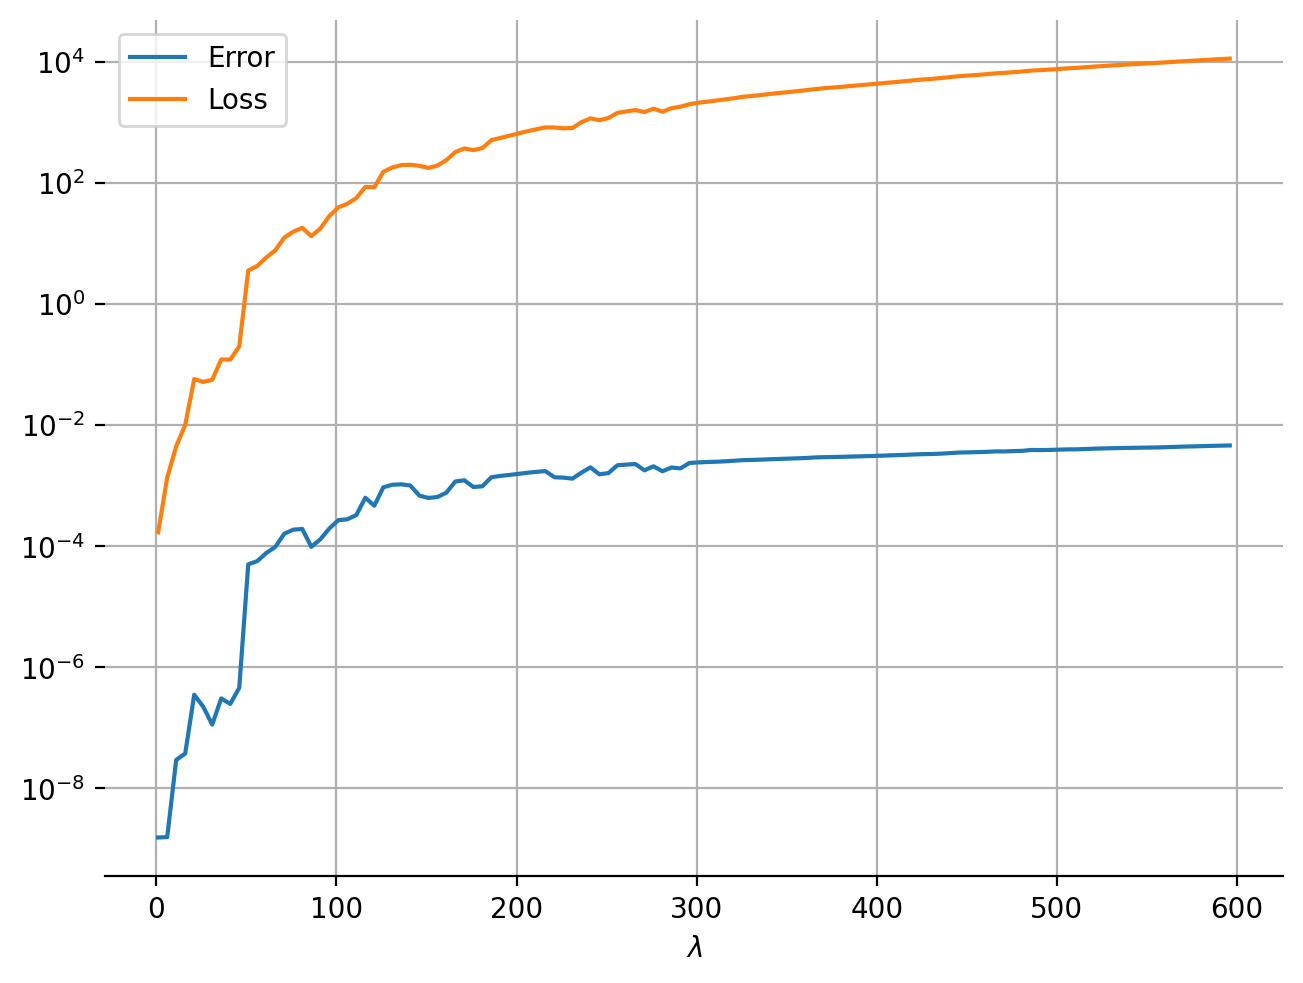

In [ ]:
fig, ax = plt.subplots()
ax.plot(C, DATA11, c="C0", label="Error")
ax.plot(C, DATA12, c="C1", label="Loss")

ax.set(
    yscale="log",
    xlabel=r"$\lambda$"
)
ax.grid()
ax.legend()
ax.spines[["top", "right", "left"]].set_visible(False)
pass

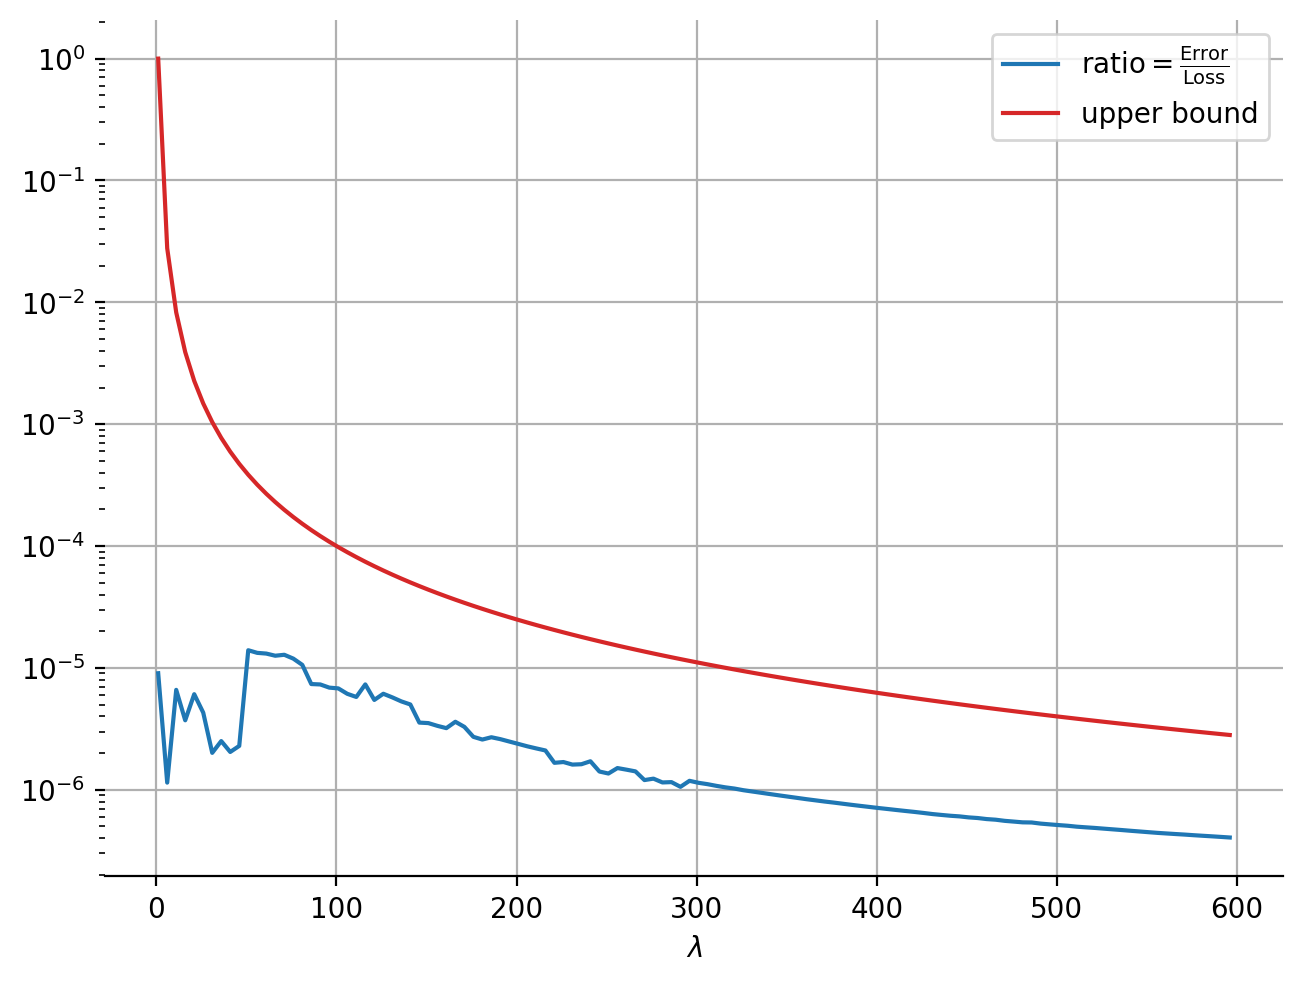

In [ ]:
fig, ax = plt.subplots()
ax.plot(C, RATIO1, c="C0", label=r"ratio$=\frac{\sf Error}{\sf Loss}$")
ax.plot(C, 1/C**2, c="C3", label="upper bound")

ax.set(
    yscale="log",
    xlabel=r"$\lambda$"
)
ax.grid()
ax.legend()
ax.spines[["top", "right", "left"]].set_visible(False)
pass

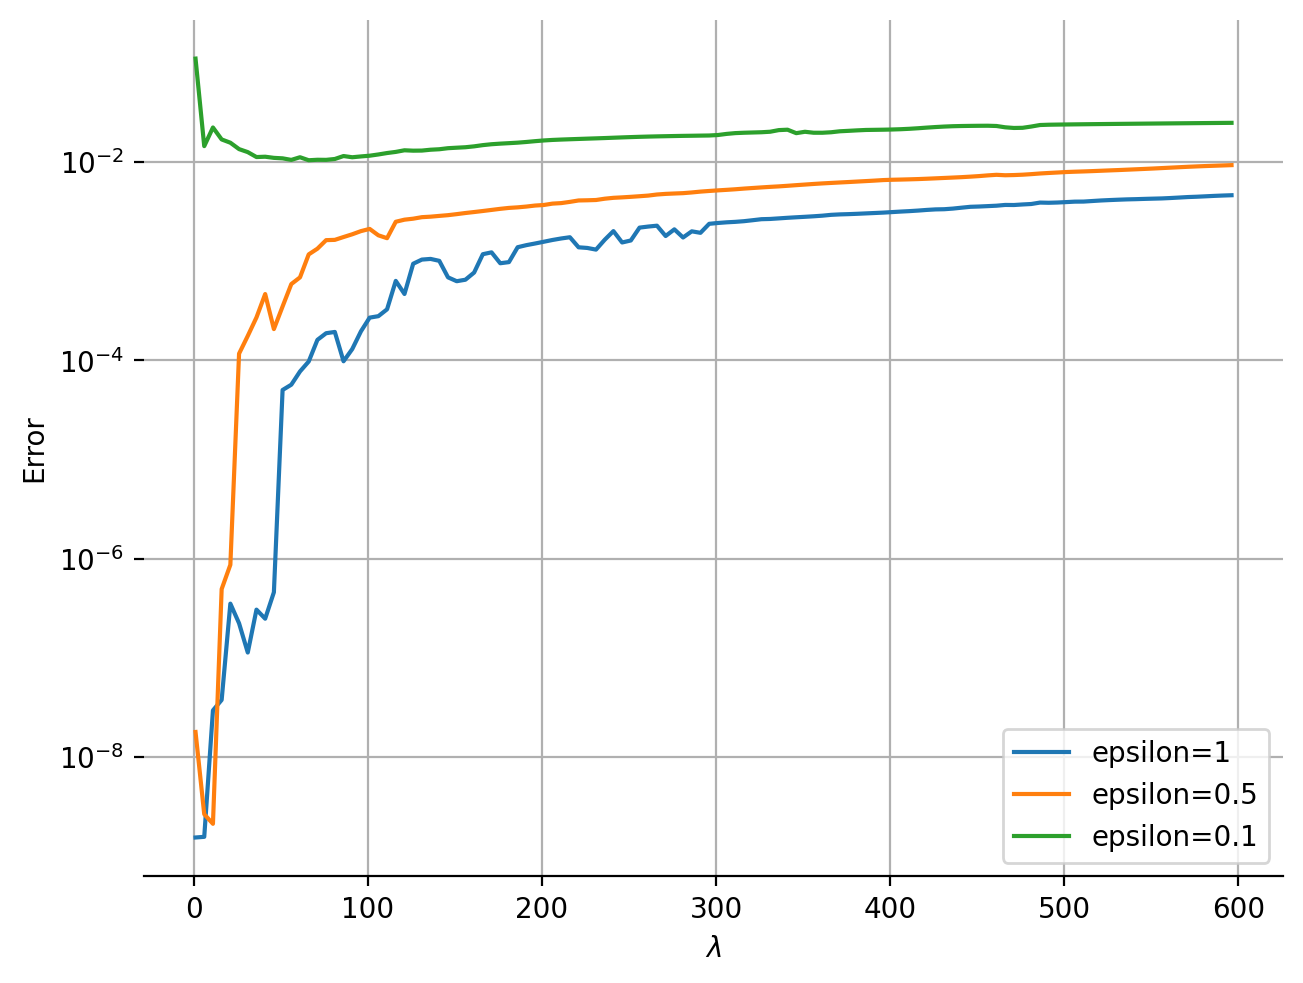

In [ ]:
fig, ax = plt.subplots()
ax.plot(C, DATA11, c="C0", label="epsilon=1")
ax.plot(C, DATA21, c="C1", label="epsilon=0.5")
ax.plot(C, DATA31, c="C2", label="epsilon=0.1")

ax.set(
    yscale="log",
    xlabel=r"$\lambda$",
    ylabel="Error"
)
ax.grid()
ax.legend()
ax.spines[["top", "right", "left"]].set_visible(False)
pass

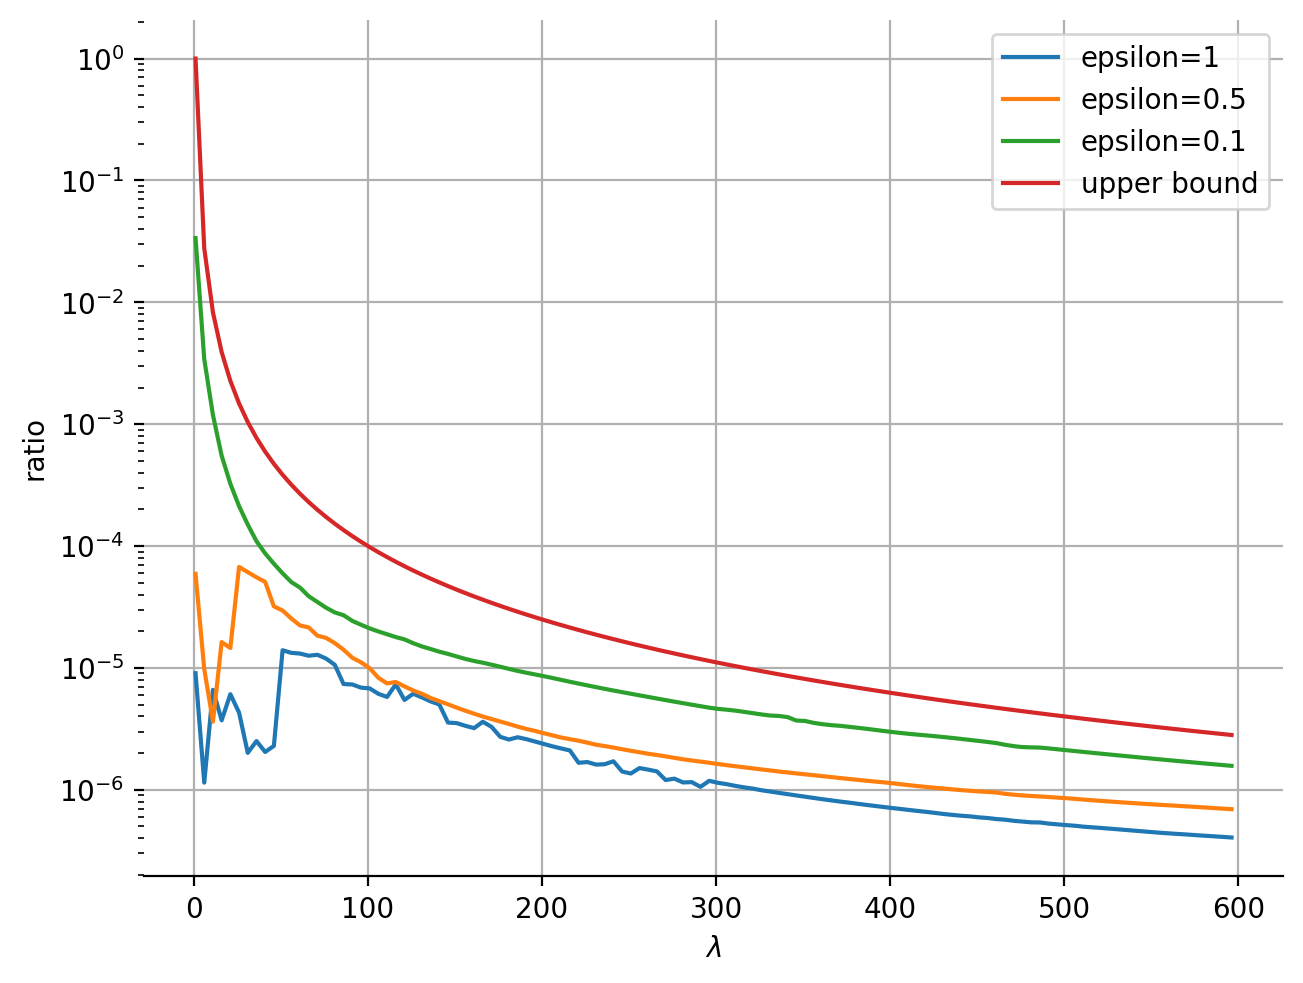

In [ ]:
fig, ax = plt.subplots()
ax.plot(C, RATIO1, c="C0", label="epsilon=1")
ax.plot(C, RATIO2, c="C1", label="epsilon=0.5")
ax.plot(C, RATIO3, c="C2", label="epsilon=0.1")
ax.plot(C, 1/C**2, c="C3", label="upper bound")

ax.set(
    yscale="log",
    xlabel=r"$\lambda$",
    ylabel="ratio"
)
ax.grid()
ax.legend()
ax.spines[["top", "right", "left"]].set_visible(False)
pass